# **Trabajo Fin de Máster**


---



## **ESTIMACIÓN DE RIESGOS GEOPOLÍTICOS Y SU IMPACTO EN LOS MERCADOS FINANCIEROS INTERNACIONALES MEDIANTE MODELOS PREDICTIVOS**

---



**AUTOR:** Pablo Huidobro, Jaime Moral y Daniel Bravo

**TUTOR ACADÉMICO**: Montserrat Ana Miranda Galcerán

**TUTOR DE EMPRESA**: Eduardo Arroyo y José María Gómez

En **Madrid** a **24** de **abril** de **2025**



## **Índice**

1. [Carga e integración de datos](#1-carga-e-integración-de-datos)  
   - [1.1 Carga de los datasets originales](#11-carga-de-los-datasets-originales)  
   - [1.2 Conversión de las variables temporales](#12-conversión-de-las-variables-temporales)  
   - [1.3 Validación de fechas comunes y eliminación de fechas problemáticas](#13-validación-de-fechas-comunes-y-eliminación-de-fechas-problemáticas)  
   - [1.4 Filtrado de ambos datasets a fechas comunes](#14-filtrado-de-ambos-datasets-a-fechas-comunes)  
   - [1.5 Combinación final](#15-combinación-final)

2. [Descripción estructural de las bases de datos](#2-descripción-estructural-de-las-bases-de-datos)  
   - [2.1 Indicadores Geopolíticos (weekly_data.xlsx)](#21-indicadores-geopolíticos-weekly_dataxlsx)  
   - [2.2 Precios de Materias Primas (datos_mmpp.csv)](#22-precios-de-materias-primas-datos_mmppcsv)

3. [Análisis de la muestra de datos](#3-análisis-de-la-muestra-de-datos)  
   - [3.1 Volumetría inicial](#31-volumetría-inicial)  
   - [3.2 Filtros aplicados](#32-filtros-aplicados)  
   - [3.3 Volumetría final](#33-volumetría-final)

4. [Análisis de Calidad del Dato](#4-análisis-de-calidad-del-dato)  
   - [4.1 Valores nulos](#41-valores-nulos)  
   - [4.2 Duplicados](#42-duplicados)  
   - [4.3 Análisis de Valores Extremos (Outliers)](#43-análisis-de-valores-extremos-outliers)  
   - [4.4 Análisis de Valor de las Variables y Descarte por Alta Correlación](#44-análisis-de-valor-de-las-variables-y-descarte-por-alta-correlación)  
   - [4.5 Validación de consistencia temporal y semántica](#45-validación-de-consistencia-temporal-y-semantica)

5. [Análisis Estadístico de Datos](#5-análisis-estadístico-de-datos)  
   - [5.1 Análisis univariante](#51-análisis-univariante)  
   - [5.2 Análisis Bivariante entre Variables Explicativas y Materias Primas](#52-análisis-bivariante-entre-variables-explicativas-y-materias-primas)  
   - [5.3 Distribución y comportamiento de las materias primas](#53-distribución-y-comportamiento-de-las-materias-primas)  
   - [5.4 Análisis de outliers](#54-análisis-de-outliers)  
   - [5.5 Pruebas de normalidad](#55-pruebas-de-normalidad)  
   - [5.6 Análisis de correlación entre variables independientes](#56-análisis-de-correlación-entre-variables-independientes)  
   - [5.7 Detección de outliers en variables clave](#57-detección-de-outliers-en-variables-clave)  
   - [5.8 Análisis de normalidad](#58-análisis-de-normalidad)  
   - [5.9 Análisis de correlación múltiple](#59-análisis-de-correlación-múltiple)  
   - [5.10 Selección de variables: eliminación por alta correlación](#510-selección-de-variables-eliminación-por-alta-correlación)  
   - [5.11 Selección de variables: eliminación por baja varianza](#511-selección-de-variables-eliminación-por-baja-varianza)

6. [Preprocesado y Normalización](#6-preprocesado-y-normalización)  
   - [Tratamiento de la variable dependiente: variación semanal](#tratamiento-de-la-variable-dependiente-variación-semanal)




# **1. Carga e integración de datos**

Este apartado tiene como objetivo cargar las dos fuentes principales de información utilizadas en el proyecto: los indicadores geopolíticos (`weekly_data.xlsx`) y los precios de las materias primas (`datos_mmpp.csv`).

Se procede a realizar una conversión y validación temporal de ambas bases de datos para garantizar su alineación y facilitar su posterior combinación. El resultado será un único dataset integrado con frecuencia semanal que servirá como base para el análisis.



## **1.1 Carga de los datasets originales**

Se importan los dos datasets principales:
- `weekly_data.xlsx`: contiene precios, volatilidades y volúmenes semanales de petróleo, gas y oro.
- `datos_mmpp.csv`: recoge variables de riesgo geopolítico y factores macroeconómicos relevantes.


In [1]:
from google.colab import files
uploaded = files.upload()


Saving weekly_data.xlsx to weekly_data.xlsx
Saving datos_mmpp.csv to datos_mmpp.csv


In [2]:
import pandas as pd

# Cargar datos de materias primas
datos_mmpp = pd.read_csv("datos_mmpp.csv")

# Cargar datos geopolíticos
weekly_data = pd.read_excel("weekly_data.xlsx")


## **1.2 Conversión de las variables temporales**

Para poder fusionar ambos datasets correctamente, se convierten las columnas de fecha al tipo `datetime`.


In [3]:
# Convertir a tipo datetime
weekly_data['week'] = pd.to_datetime(weekly_data['week'])
datos_mmpp['Date'] = pd.to_datetime(datos_mmpp['Date'])


## **1.3 Validación de fechas comunes y eliminación de fechas problemáticas**

In [4]:
# Comprobar intersección de fechas
fechas_comunes = set(weekly_data['week']).intersection(set(datos_mmpp['Date']))
print(f"Fechas comunes: {len(fechas_comunes)}")

# Eliminar fecha problemática si existe
weekly_data = weekly_data[weekly_data['week'] != "2025-01-06"]


Fechas comunes: 784


## **1.4 Filtrado de ambos datasets a fechas comunes**

In [5]:
weekly_data = weekly_data[weekly_data['week'].isin(fechas_comunes)].sort_values('week')
datos_mmpp = datos_mmpp[datos_mmpp['Date'].isin(fechas_comunes)].sort_values('Date')


## **1.5 Combinación final**

In [6]:
# Fusionar datasets
df_final = pd.merge(weekly_data, datos_mmpp, left_on='week', right_on='Date')

# Eliminar columnas redundantes
df_final.drop(columns=['Date'], inplace=True)

# Establecer la semana como índice temporal
df_final.set_index('week', inplace=True)

print(f"Dataset final con {df_final.shape[0]} semanas y {df_final.shape[1]} variables.")


Dataset final con 783 semanas y 90 variables.


# **2. Descripción estructural de las bases de datos**

En este apartado se describe la naturaleza y estructura de las dos fuentes de datos utilizadas en el proyecto. El objetivo es ofrecer una visión clara de su contenido, su cobertura temporal y su adecuación al análisis planteado.

A continuación se presenta un resumen de las características principales de cada una.



## **2.1 Indicadores Geopolíticos (weekly_data.xlsx)**

Este dataset contiene información semanal sobre variables relacionadas con el riesgo geopolítico y eventos internacionales. Cada fila representa una semana, y las columnas corresponden a índices, indicadores por país, y variables binarias relacionadas con conflictos o actores involucrados.

- **Nombre del dataset:** weekly_data
- **Periodicidad:** Semanal
- **Cobertura temporal:** Desde enero de 2010 hasta mayo de 2025
- **Nº de variables:** ~100
- **Variables destacadas:**
  - `GPRC_*`: Índices compuestos de riesgo geopolítico por país (Caldara & Iacoviello, 2022)
  - `conflict_event`: Variable binaria que indica si hubo un conflicto esa semana
  - `OPEP_involved`, `Russia_involved`, etc.: Participación de actores relevantes


In [7]:
print(" Dataset weekly_data:")
weekly_data.info()
display(weekly_data.head(3))


 Dataset weekly_data:
<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 0 to 782
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   week                       783 non-null    datetime64[ns]
 1   GPRC_ARG                   783 non-null    object        
 2   GPRC_AUS                   783 non-null    object        
 3   GPRC_BEL                   783 non-null    object        
 4   GPRC_BRA                   783 non-null    object        
 5   GPRC_CAN                   783 non-null    object        
 6   GPRC_CHN                   783 non-null    object        
 7   GPRC_DEU                   783 non-null    object        
 8   GPRC_DNK                   783 non-null    object        
 9   GPRC_ESP                   783 non-null    object        
 10  GPRC_FIN                   783 non-null    object        
 11  GPRC_FRA                   783 non-null    object     

,week,GPRC_ARG,GPRC_AUS,GPRC_BEL,GPRC_BRA,GPRC_CAN,GPRC_CHN,GPRC_DEU,GPRC_DNK,GPRC_ESP,...,GEPU_Mainland China,GEPU_Sweden,GEPU_Mexico,OPEP_sanction_active,num_sanctions,num_OPEP_sanctioned,num_OPEP_sanctions_active,avg_sanction_duration,severity_index,zew_weekly
0,2010-01-04,"0,018484972417354584","0,040666937828063965","0,018484972417354584","0,06284890323877335","0,18854671716690063","0,3660024404525757","0,19594070315361023","0,08133387565612793","0,03327294811606407",...,119.162039,81.353116,"102,5767700103908",1,181,5,20,"6274,657458563536","2,0386740331491713",47.2
1,2010-01-11,"0,018484972417354584","0,040666937828063965","0,018484972417354584","0,06284890323877335","0,18854671716690063","0,3660024404525757","0,19594070315361023","0,08133387565612793","0,03327294811606407",...,119.162039,81.353116,"102,5767700103908",1,181,5,20,"6274,657458563536","2,0386740331491713",47.2
2,2010-01-18,"0,018484972417354584","0,040666937828063965","0,018484972417354584","0,06284890323877335","0,18854671716690063","0,3660024404525757","0,19594070315361023","0,08133387565612793","0,03327294811606407",...,119.162039,81.353116,"102,5767700103908",1,181,5,20,"6274,657458563536","2,0386740331491713",47.2


In [8]:
import pandas as pd

# Supongamos que tienes tu DataFrame 'weekly_data'
df = weekly_data.copy()

# 1) Identificar las columnas object (salvo la fecha)
obj_cols = df.select_dtypes(include='object').columns

# 2) Reemplazar la coma decimal por punto y convertir a float
for col in obj_cols:
    df[col] = (
        df[col]
        .str.replace(',', '.', regex=False)   # "0,123" → "0.123"
        .pipe(pd.to_numeric, errors='coerce')  # cadenas no convertibles → NaN
    )

# 3) Verificar que ahora sean floats
print(df[obj_cols].dtypes)


GPRC_ARG                 float64
GPRC_AUS                 float64
GPRC_BEL                 float64
GPRC_BRA                 float64
GPRC_CAN                 float64
GPRC_CHN                 float64
GPRC_DEU                 float64
GPRC_DNK                 float64
GPRC_ESP                 float64
GPRC_FIN                 float64
GPRC_FRA                 float64
GPRC_GBR                 float64
GPRC_HUN                 float64
GPRC_IDN                 float64
GPRC_IND                 float64
GPRC_ITA                 float64
GPRC_JPN                 float64
GPRC_KOR                 float64
GPRC_MEX                 float64
GPRC_NLD                 float64
GPRC_POL                 float64
GPRC_PRT                 float64
GPRC_RUS                 float64
GPRC_SAU                 float64
GPRC_SWE                 float64
GPRC_TUR                 float64
GPRC_USA                 float64
GPRC_VEN                 float64
GPRC_ZAF                 float64
avg_voter_turnout        float64
GEPU_curre

## **2.2 Precios de Materias Primas (datos_mmpp.csv)**

Este dataset contiene el valor semanal de varias materias primas estratégicas, en concreto oro, petróleo y gas natural. Sirve como variable dependiente principal para el análisis del impacto del riesgo geopolítico en los mercados.

- **Nombre del dataset:** datos_mmpp
- **Periodicidad:** Semanal
- **Cobertura temporal:** Desde enero de 2010 hasta mayo de 2025
- **Nº de variables:** 4
- **Variables:**
  - `Date`: Fecha de la observación
  - `Gold`: Precio semanal del oro
  - `Oil`: Precio semanal del barril de petróleo
  - `Gas`: Precio semanal del gas natural


In [9]:
print(" Dataset datos_mmpp:")
datos_mmpp.info()
display(datos_mmpp.head(3))


 Dataset datos_mmpp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                784 non-null    datetime64[ns]
 1   close_gold_norm     784 non-null    float64       
 2   Volume_gold         784 non-null    int64         
 3   returnsumweek_gold  784 non-null    float64       
 4   volatilidad_gold    783 non-null    float64       
 5   kurtosis_gold       783 non-null    float64       
 6   close_oil_norm      784 non-null    float64       
 7   Volume_oil          784 non-null    int64         
 8   returnsumweek_oil   784 non-null    float64       
 9   volatilidad_oil     783 non-null    float64       
 10  kurtosis_oil        783 non-null    float64       
 11  close_gas_norm      784 non-null    float64       
 12  Volume_gas          784 non-null    int64         
 13  returnsumweek_gas   784 non-n

,Date,close_gold_norm,Volume_gold,returnsumweek_gold,volatilidad_gold,kurtosis_gold,close_oil_norm,Volume_oil,returnsumweek_oil,volatilidad_oil,kurtosis_oil,close_gas_norm,Volume_gas,returnsumweek_gas,volatilidad_gas,kurtosis_gas
0,2010-01-04,0.993813,1770,0.009439,0.013085,0.781510,1.012505,677079,0.034194,0.012272,3.473617,0.959057,249225,-0.017855,0.039582,3.715309
1,2010-01-11,1.025289,703,0.029097,0.007514,-1.650715,1.048318,1482259,0.012315,0.008949,2.218607,0.956761,597160,-0.075887,0.046970,2.740267
2,2010-01-18,1.024657,240,-0.018064,0.012632,-4.001650,1.008728,1211452,-0.056332,0.007751,1.630260,0.943364,534517,0.042537,0.024372,3.640444


# **3. Análisis de la muestra de datos**

En este apartado se analiza la evolución de la muestra de datos desde su volumen inicial hasta la construcción del dataset final integrado (`df_final`). El objetivo es documentar con transparencia los filtros aplicados durante el preprocesamiento y justificar las decisiones tomadas en esta fase inicial del proyecto.



### **3.1 Volumetría inicial**

Se parte de dos datasets independientes:

- **weekly_data.xlsx:** Contiene `n_weekly` semanas de indicadores geopolíticos.
- **datos_mmpp.csv:** Contiene `n_mmpp` semanas con precios de materias primas.

Ambos datasets se solapan temporalmente, pero no todas las fechas están presentes en ambos, por lo que se requiere un filtrado.


In [10]:
n_weekly = weekly_data.shape[0]
n_mmpp   = datos_mmpp.shape[0]

print(f"Registros en weekly_data.xlsx: {n_weekly}")
print(f"Registros en datos_mmpp.csv: {n_mmpp}")


Registros en weekly_data.xlsx: 783
Registros en datos_mmpp.csv: 784


### **3.2 Filtros aplicados**

Se han aplicado los siguientes filtros para garantizar la coherencia temporal:

- Conversión de columnas temporales a formato `datetime`.
- Eliminación explícita de la fecha `2025-01-06`, por generar conflictos durante el `merge`.
- Filtrado para conservar únicamente las semanas con datos en ambos datasets (intersección temporal).


### **3.3 Volumetría final**

El dataset resultante (`df_final`) contiene únicamente las semanas en las que existe información cruzada sobre indicadores geopolíticos y precios de materias primas.

Se compone de:

- `n_final` semanas con información consolidada.
- `n_variables` variables, tras eliminar columnas redundantes.

Este dataset es la base sobre la que se construirá el análisis estadístico y predictivo.


In [11]:
n_final = df_final.shape[0]
n_variables = df_final.shape[1]

print(f"Dataset final (df_final): {n_final} semanas, {n_variables} variables.")


Dataset final (df_final): 783 semanas, 90 variables.


# **4. Análisis de Calidad del Dato**

En este capítulo se evalúa la calidad de los datos utilizados en el análisis, abordando aspectos clave como la presencia de valores nulos y duplicados, la detección de outliers, la redundancia por alta correlación entre variables y la consistencia temporal y semántica de la información.


## **4.1 Valores nulos**

Se identifican columnas que presentan valores ausentes (`NaN`) para evaluar su impacto y decidir si deben imputarse o eliminarse.

En este proyecto, se ha optado por eliminar las columnas con más del 40% de valores nulos y revisar individualmente las que tienen menos del 5%.


In [12]:
# Mostrar todas las columnas con al menos un valor nulo, ordenadas de mayor a menor
import pandas as pd
pd.set_option('display.max_rows', None)

df_final.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]



,0
Iran_conflict_count,366
shock_event,366
Russia_involved,366
Russia_conflict_count,366
Iran_involved,366
USA_conflict_count,366
OPEP_involved,366
OPEP_conflict_count,366
USA_involved,366
conflict_count,366


## **4.2 Duplicados**

Se verifica si existen registros duplicados a nivel de semana, lo cual podría distorsionar el análisis temporal.


In [13]:
# Porcentaje de valores nulos por columna
porcentaje_nulos = df_final.isnull().mean().sort_values(ascending=False) * 100
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]

# Mostrar solo las variables con nulos
print(" Variables con valores nulos (ordenadas por porcentaje):")
display(porcentaje_nulos)


 Variables con valores nulos (ordenadas por porcentaje):


,0
Iran_conflict_count,46.743295
shock_event,46.743295
Russia_involved,46.743295
Russia_conflict_count,46.743295
Iran_involved,46.743295
USA_conflict_count,46.743295
OPEP_involved,46.743295
OPEP_conflict_count,46.743295
USA_involved,46.743295
conflict_count,46.743295


## **4.3 Análisis de Valores Extremos (Outliers)**

Para detectar posibles valores atípicos que puedan distorsionar el análisis, se realiza una exploración gráfica y cuantitativa de las principales variables asociadas al precio del oro.

Se utilizan diagramas de caja (boxplots) para visualizar la distribución de las siguientes variables clave:

- `close_gold_norm`: precio del oro normalizado.
- `Volume_gold`: volumen negociado.
- `returnsumweek_gold`: rentabilidad semanal acumulada.
- `volatilidad_gold`: volatilidad semanal.
- `kurtosis_gold`: curtosis, indicador de la forma de la distribución.

Este análisis permite detectar observaciones anómalas que puedan influir de forma excesiva en los modelos estadísticos posteriores.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


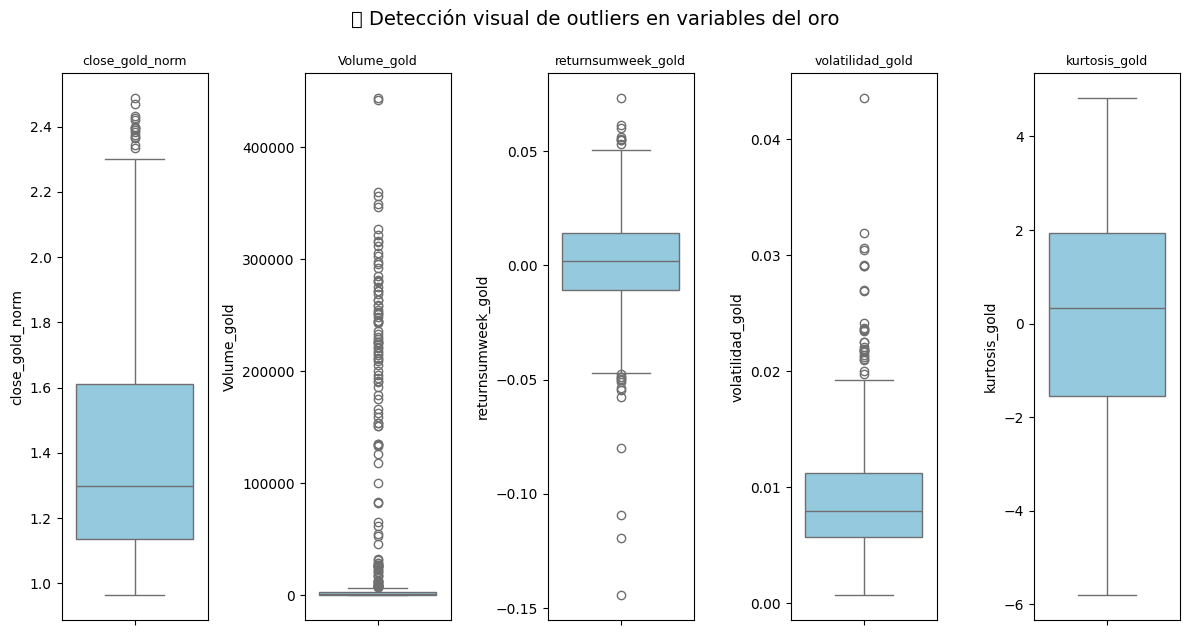

In [14]:
# Lista de variables del oro a analizar
vars_gold = ['close_gold_norm', 'Volume_gold', 'returnsumweek_gold', 'volatilidad_gold', 'kurtosis_gold']

# Boxplots para detectar outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, var in enumerate(vars_gold, 1):
    plt.subplot(1, len(vars_gold), i)
    sns.boxplot(y=df_final[var], color='skyblue')
    plt.title(var, fontsize=9)
    plt.tight_layout()

plt.suptitle("🎯 Detección visual de outliers en variables del oro", fontsize=14, y=1.05)
plt.show()


## **4.4 Análisis de Valor de las Variables y Descarte por Alta Correlación**

Antes de modelizar, es esencial identificar aquellas variables que no aportan valor explicativo o que podrían introducir redundancia en los modelos predictivos.

Se han llevado a cabo los siguientes pasos:

- **Análisis de varianza:** para detectar variables con muy poca variabilidad.
- **Matriz de correlación:** para identificar relaciones lineales fuertes entre variables.
- **Descarte de variables redundantes:** si dos variables presentan una alta correlación (por ejemplo, >0.9), se conserva solo una de ellas.

Este análisis busca asegurar un conjunto de predictores más robusto y sin colinealidades que afecten a los resultados estadísticos.


In [15]:
# 1. Matriz de correlación para variables numéricas
corr_matrix = df_final.corr(numeric_only=True)

# 2. Identificar pares de variables muy correlacionadas (valor absoluto > 0.9)
umbral = 0.9
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # eliminar diagonal
corr_pairs = corr_pairs[corr_pairs > umbral]  # dejar solo alta correlación

# Eliminar duplicados tipo (A,B) y (B,A)
corr_pairs = corr_pairs.reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']
corr_pairs['Ordenadas'] = corr_pairs.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='Ordenadas').drop(columns='Ordenadas')

# Mostrar pares con alta correlación
print("Variables con alta correlación (> 0.9):")
display(corr_pairs)


Variables con alta correlación (> 0.9):


,Variable 1,Variable 2,Correlación
0,num_sanctions,num_OPEP_sanctions_active,0.968795
2,num_OPEP_sanctions_active,num_OPEP_sanctioned,0.941795
4,num_OPEP_sanctioned,num_sanctions,0.934739
6,USA_involved,USA_conflict_count,0.924347


## **4.5 Validación de consistencia temporal y semántica**

Uno de los pasos más críticos en la construcción del dataset final ha sido garantizar la consistencia temporal entre las dos fuentes de información integradas:

- `weekly_data.xlsx`: contiene indicadores geopolíticos semanales.
- `datos_mmpp.csv`: contiene precios semanales de materias primas.

Se ha llevado a cabo un proceso de alineación y limpieza, que ha incluido:

- Conversión de las columnas de fecha al tipo `datetime`.
- Comparación de coberturas temporales y eliminación de semanas sin correspondencia en ambas fuentes.
- Eliminación manual de semanas con conflictos específicos (como la semana del 6 de enero de 2025), que generaban duplicidades o huecos en el merge.

Esto ha permitido asegurar que cada fila del `df_final` representa una observación completa, homogénea y sincronizada.


In [16]:
import pandas as pd

#  Cargar el dataset de indicadores geopolíticos
weekly_data = pd.read_excel("weekly_data.xlsx")

#  Cargar el dataset de materias primas
datos_mmpp = pd.read_csv("datos_mmpp.csv")

#  Limpiar nombres de columnas (eliminar espacios en blanco)
weekly_data.columns = weekly_data.columns.str.strip()
datos_mmpp.columns = datos_mmpp.columns.str.strip()

#  Confirmar que las columnas de fecha existen
print("Columna temporal en weekly_data:", 'week' in weekly_data.columns)
print("Columna temporal en datos_mmpp:", 'Date' in datos_mmpp.columns)

#  Convertir a formato datetime las columnas de fecha
weekly_data['week'] = pd.to_datetime(weekly_data['week'])
datos_mmpp['Date'] = pd.to_datetime(datos_mmpp['Date'])

#  Eliminar fechas inconsistentes si fuera necesario
weekly_data = weekly_data[weekly_data['week'] != "2025-01-06"]

#  Alinear ambas bases por fechas comunes
fechas_comunes = set(weekly_data['week']).intersection(set(datos_mmpp['Date']))
weekly_data = weekly_data[weekly_data['week'].isin(fechas_comunes)].sort_values('week')
datos_mmpp = datos_mmpp[datos_mmpp['Date'].isin(fechas_comunes)].sort_values('Date')

# Unir datasets por fecha
df_final = pd.merge(weekly_data, datos_mmpp, left_on='week', right_on='Date')

# Eliminar columna duplicada y establecer índice temporal
df_final.drop(columns=['Date'], inplace=True)
df_final.set_index('week', inplace=True)

# Confirmar dimensiones del dataset final
print(f" Dataset final con {df_final.shape[0]} semanas y {df_final.shape[1]} variables.")


Columna temporal en weekly_data: True
Columna temporal en datos_mmpp: True
 Dataset final con 783 semanas y 90 variables.


# **5. Análisis Estadístico de Datos**

En este apartado se realiza un estudio estadístico detallado de las variables disponibles en el dataset final, con el objetivo de comprender su comportamiento y distribución. El análisis estadístico es un paso fundamental previo a cualquier proceso de modelización, ya que permite:

- Identificar patrones, tendencias y relaciones entre variables.
- Detectar posibles problemas de calidad del dato, como valores atípicos o distribuciones anómalas.
- Evaluar la idoneidad de las variables para su uso como predictores en modelos estadísticos o de machine learning.

El análisis se divide en tres bloques principales:

- **5.1 Análisis univariante:** Se estudia individualmente cada variable, calculando medidas de tendencia central, dispersión y forma. Se incluyen representaciones gráficas que facilitan la comprensión visual de las distribuciones.

- **5.2 Análisis bivariante:** Se analizan las relaciones entre la variable explicativa principal (índice de riesgo geopolítico) y las variables dependientes (precios de materias primas). Se emplean gráficos de dispersión y cálculos de correlación.

- **5.3 Análisis multivariante (opcional):** Si se requiere, se evaluarán relaciones entre múltiples variables simultáneamente para detectar estructuras subyacentes o redundancias.

Este análisis permitirá depurar y seleccionar las variables más relevantes y robustas para la siguiente fase del estudio, centrada en la modelización.


## **5.1 Análisis univariante**

El análisis univariante examina el comportamiento individual de cada variable del dataset, sin considerar relaciones con otras variables. Este tipo de análisis permite:

- Detectar sesgos en la distribución.
- Evaluar la existencia de valores extremos (outliers).
- Observar patrones estacionales o tendencias si la variable es temporal.
- Confirmar la validez estadística de las variables antes de su uso en modelado.

En este apartado se aplican las siguientes técnicas:

- **Estadísticos descriptivos** (media, mediana, desviación estándar, mínimo, máximo, curtosis y asimetría).
- **Histogramas** para visualizar la distribución.
- **Boxplots** para identificar outliers.
- **Distribución temporal (si aplica)**: línea de tiempo para observar la evolución.


 Estadísticos descriptivos para: close_gold_norm
count    783.000000
mean       1.394552
std        0.316828
min        0.963421
25%        1.135951
50%        1.298212
75%        1.611766
max        2.487338
Name: close_gold_norm, dtype: float64
 Asimetría: 0.99
 Curtosis: 0.71


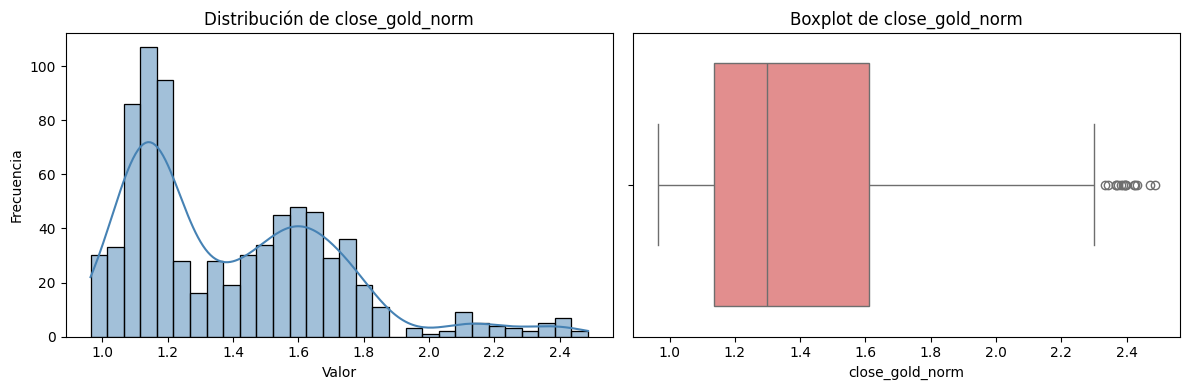

 Estadísticos descriptivos para: close_oil_norm
count    783.000000
mean       0.914075
std        0.269808
min        0.190428
25%        0.673943
50%        0.930240
75%        1.137210
max        1.535178
Name: close_oil_norm, dtype: float64
 Asimetría: -0.08
 Curtosis: -0.92


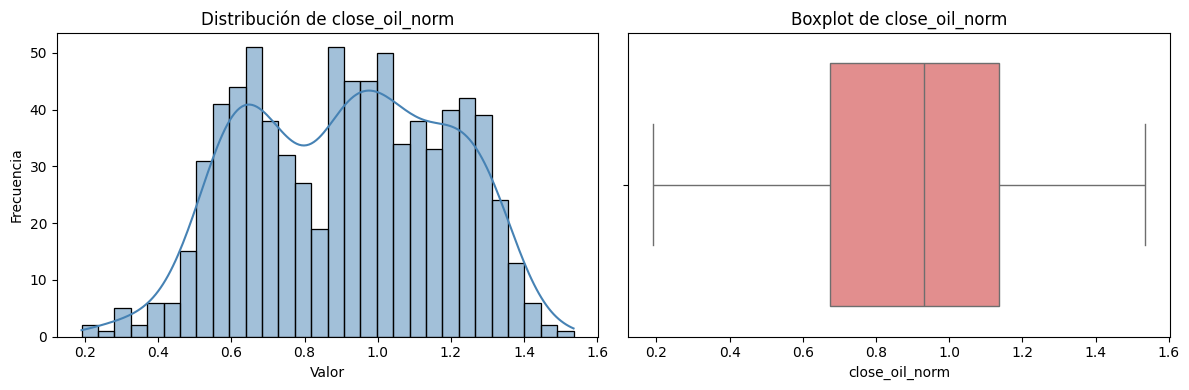

 Estadísticos descriptivos para: close_gas_norm
count    783.000000
mean       0.562327
std        0.210321
min        0.264441
25%        0.431953
50%        0.497028
75%        0.660150
max        1.561836
Name: close_gas_norm, dtype: float64
 Asimetría: 1.77
 Curtosis: 4.41


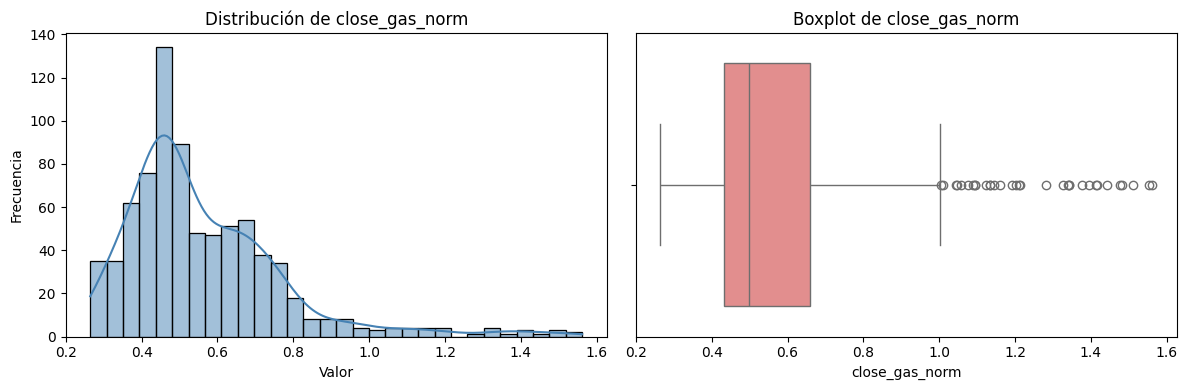

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Lista de variables objetivo
materias_primas = ['close_gold_norm', 'close_oil_norm', 'close_gas_norm']

for var in materias_primas:
    if var in df_final.columns:
        print(f" Estadísticos descriptivos para: {var}")
        print(df_final[var].describe())
        print(f" Asimetría: {skew(df_final[var].dropna()):.2f}")
        print(f" Curtosis: {kurtosis(df_final[var].dropna()):.2f}")

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histograma
        sns.histplot(df_final[var], bins=30, kde=True, ax=axes[0], color="steelblue")
        axes[0].set_title(f"Distribución de {var}")
        axes[0].set_xlabel("Valor")
        axes[0].set_ylabel("Frecuencia")

        # Boxplot
        sns.boxplot(x=df_final[var], ax=axes[1], color="lightcoral")
        axes[1].set_title(f"Boxplot de {var}")

        plt.tight_layout()
        plt.show()


## **5.2. Análisis Bivariante entre Variables Explicativas y Materias Primas**

En este apartado se estudian las relaciones estadísticas entre las materias primas analizadas (`gold`, `oil`, `gas`) y un conjunto de variables explicativas seleccionadas. Se parte de un enfoque exploratorio que permite:

- Detectar relaciones lineales simples mediante gráficos de dispersión.
- Estimar correlaciones (coeficientes de Pearson).
- Observar patrones potenciales de comportamiento conjunto entre indicadores geopolíticos y precios de las materias primas.

Este análisis sirve como base para la selección de variables relevantes en etapas posteriores de modelización.


In [18]:
# Reemplazar comas por puntos y convertir a float en todo el DataFrame
for col in df_final.columns:
    if df_final[col].dtype == 'object':
        df_final[col] = df_final[col].str.replace(',', '.', regex=False)
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')


 Análisis Bivariante: GPRC_USA vs close_gold_norm
Correlación de Pearson: 0.239


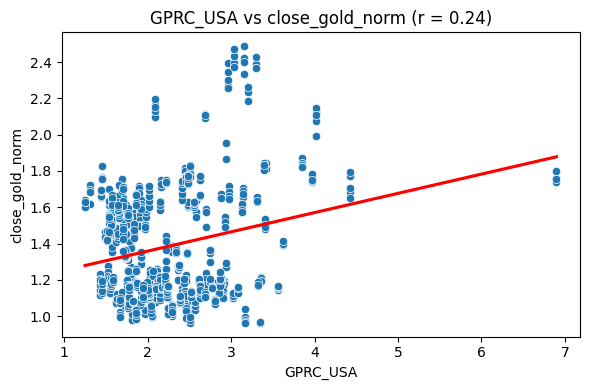

 Análisis Bivariante: conflict_count vs close_gold_norm
Correlación de Pearson: -0.379


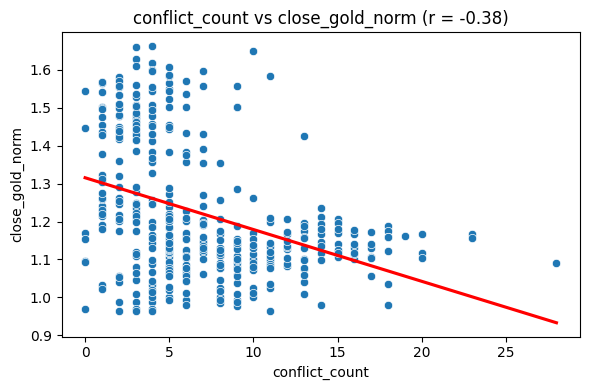

 Análisis Bivariante: GEPU_US vs close_gold_norm
Correlación de Pearson: 0.282


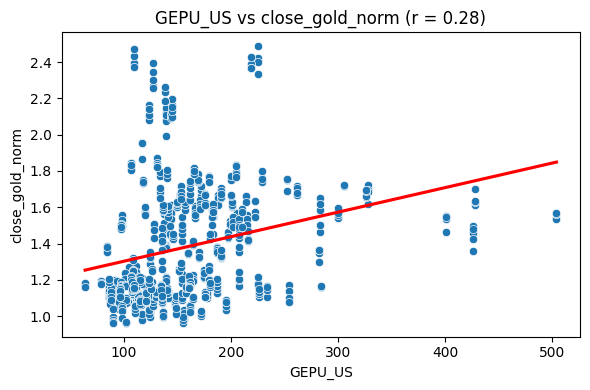

 Análisis Bivariante: zew_weekly vs close_gold_norm
Correlación de Pearson: -0.004


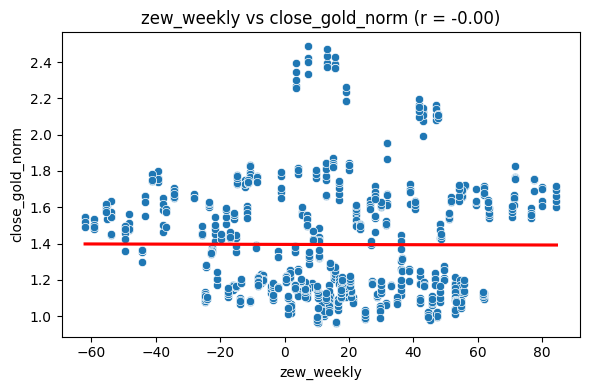

 Análisis Bivariante: severity_index vs close_gold_norm
Correlación de Pearson: -0.645


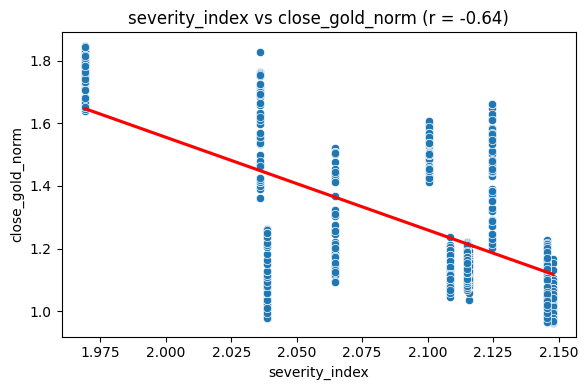

 Análisis Bivariante: GPRC_USA vs close_oil_norm
Correlación de Pearson: 0.053


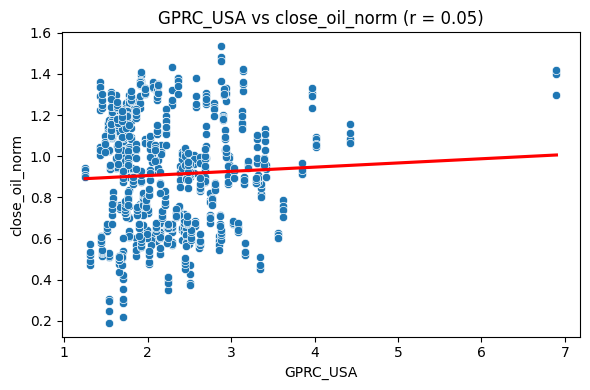

 Análisis Bivariante: conflict_count vs close_oil_norm
Correlación de Pearson: -0.143


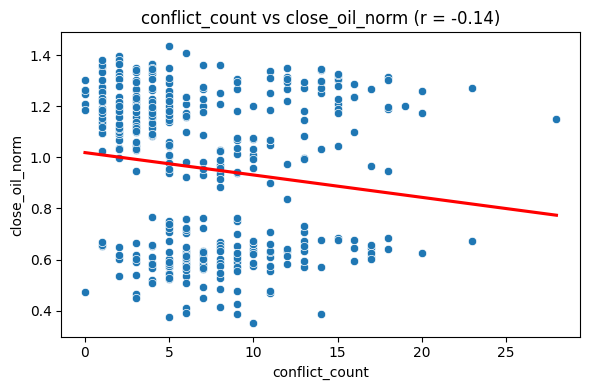

 Análisis Bivariante: GEPU_US vs close_oil_norm
Correlación de Pearson: -0.330


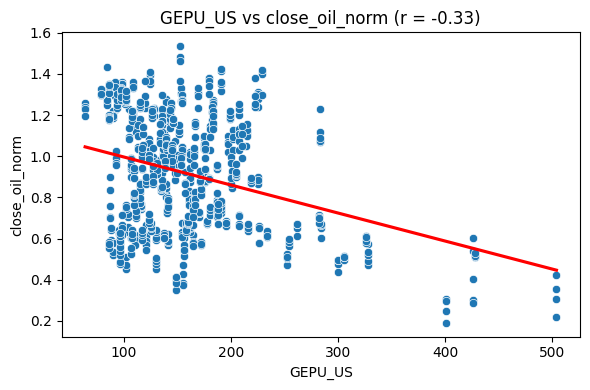

 Análisis Bivariante: zew_weekly vs close_oil_norm
Correlación de Pearson: -0.141


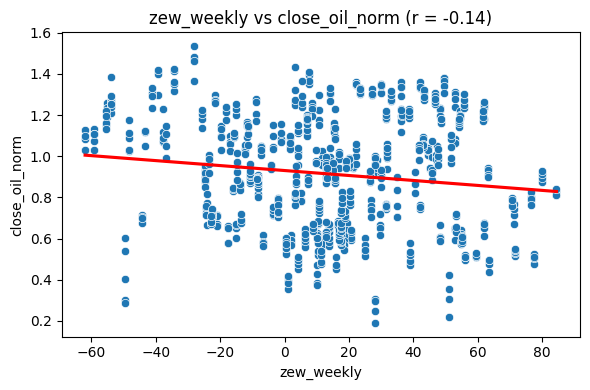

 Análisis Bivariante: severity_index vs close_oil_norm
Correlación de Pearson: -0.170


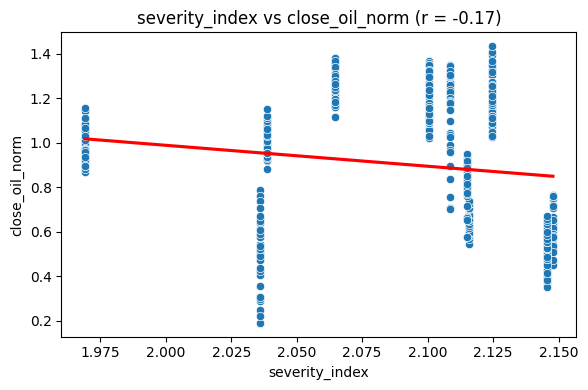

 Análisis Bivariante: GPRC_USA vs close_gas_norm
Correlación de Pearson: 0.090


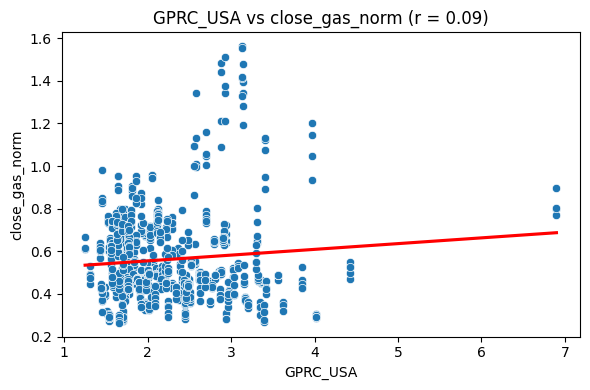

 Análisis Bivariante: conflict_count vs close_gas_norm
Correlación de Pearson: 0.170


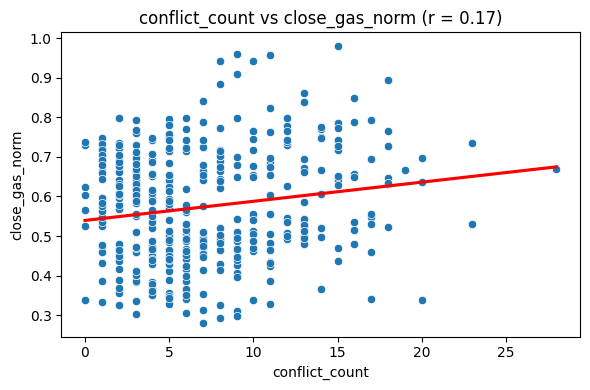

 Análisis Bivariante: GEPU_US vs close_gas_norm
Correlación de Pearson: -0.107


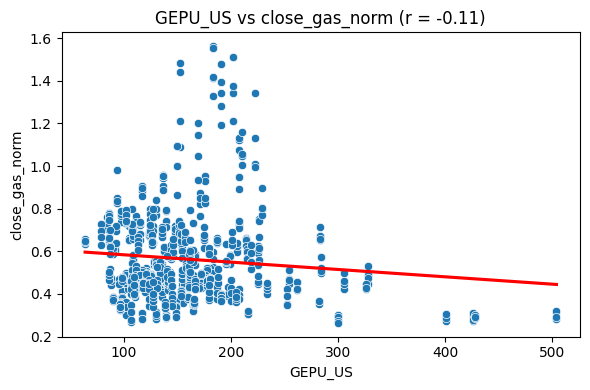

 Análisis Bivariante: zew_weekly vs close_gas_norm
Correlación de Pearson: -0.235


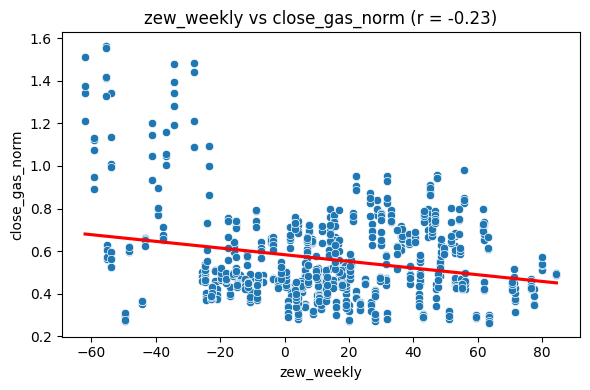

 Análisis Bivariante: severity_index vs close_gas_norm
Correlación de Pearson: 0.021


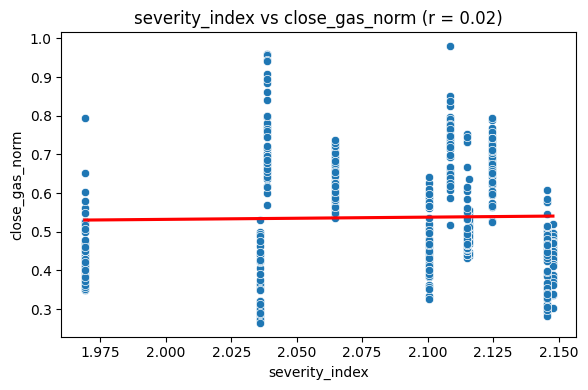

In [19]:
# Materias primas y variables explicativas relevantes
materias_primas = ['close_gold_norm', 'close_oil_norm', 'close_gas_norm']
explicativas = ['GPRC_USA', 'conflict_count', 'GEPU_US', 'zew_weekly', 'severity_index']

for y_var in materias_primas:
    for x_var in explicativas:
        if y_var in df_final.columns and x_var in df_final.columns:
            print(f" Análisis Bivariante: {x_var} vs {y_var}")
            corr = df_final[[x_var, y_var]].corr().iloc[0, 1]
            print(f"Correlación de Pearson: {corr:.3f}")

            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=df_final, x=x_var, y=y_var)
            sns.regplot(data=df_final, x=x_var, y=y_var, scatter=False, color='red', ci=None)
            plt.title(f"{x_var} vs {y_var} (r = {corr:.2f})")
            plt.xlabel(x_var)
            plt.ylabel(y_var)
            plt.tight_layout()
            plt.show()


## **5.3 Distribución y comportamiento de las materias primas**

En esta sección se analiza la distribución de las principales variables relacionadas con las materias primas —oro, petróleo y gas natural— para detectar comportamientos atípicos, asimetrías o colas pesadas.

Las variables seleccionadas son:
- `returnsumweek_*`: Retorno semanal normalizado.
- `volatilidad_*`: Medida de variabilidad semanal.
- `kurtosis_*`: Grado de concentración de las colas.
- `close_*_norm`: Cierre semanal normalizado.

Estos análisis son fundamentales para:
- Evaluar la normalidad de las variables.
- Identificar comportamientos extremos o sesgos.
- Plantear posibles transformaciones o segmentaciones antes del modelado.

A continuación, se presentan histogramas y gráficos de densidad para visualizar las distribuciones.


<Figure size 1800x400 with 0 Axes>

<Figure size 1800x400 with 0 Axes>

<Figure size 1800x400 with 0 Axes>

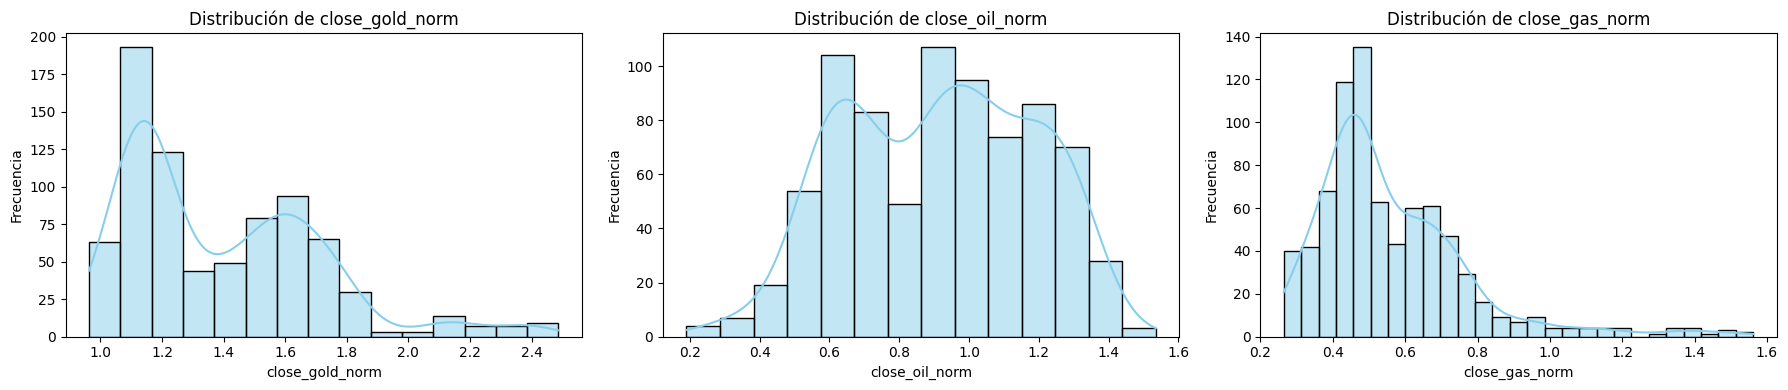

In [20]:
# Lista de materias primas y variables a analizar
commodities = ['gold', 'oil', 'gas']
features = ['returnsumweek_', 'volatilidad_', 'kurtosis_', 'close_{}_norm']

# Visualización de distribuciones por materia prima
import matplotlib.pyplot as plt
import seaborn as sns

for var_base in features:
    plt.figure(figsize=(18, 4))
    for i, comm in enumerate(commodities):
        var = var_base.format(comm)
        if var in df_final.columns:
            plt.subplot(1, 3, i+1)
            sns.histplot(df_final[var].dropna(), kde=True, color='skyblue')
            plt.title(f"Distribución de {var}")
            plt.xlabel(var)
            plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


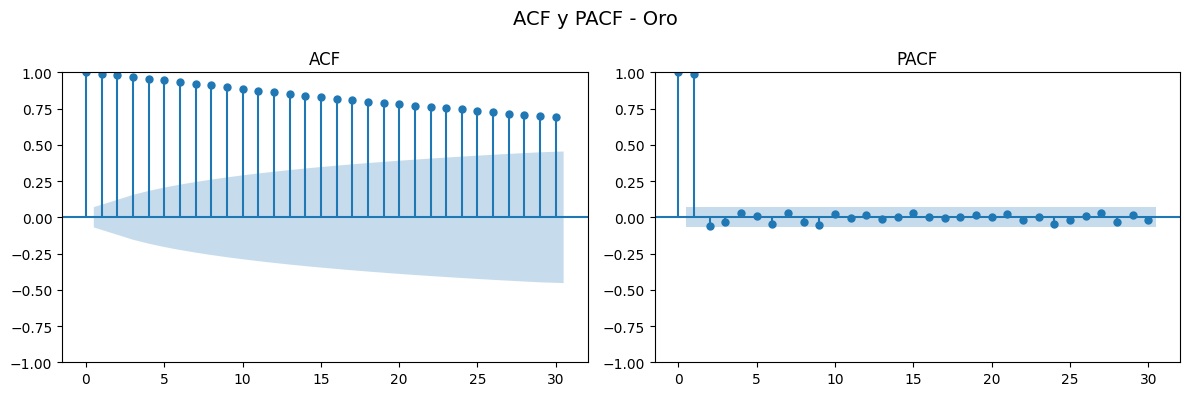

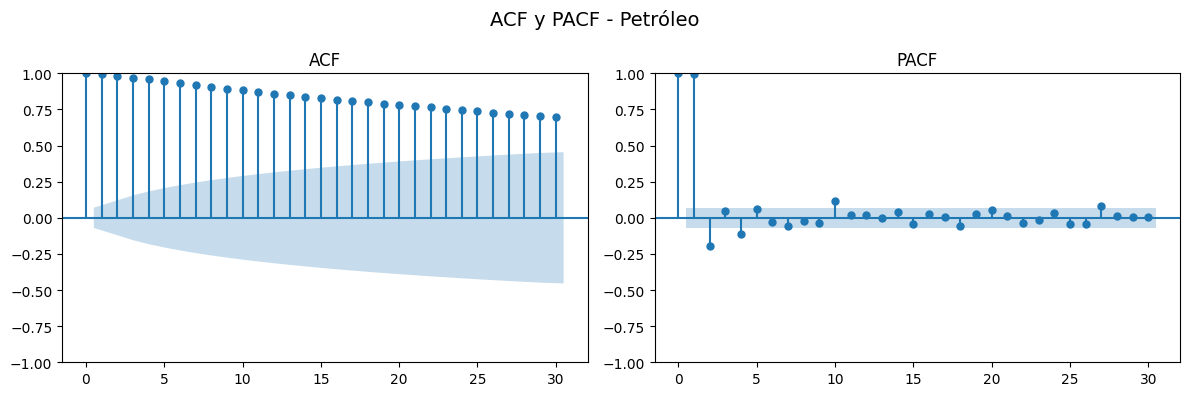

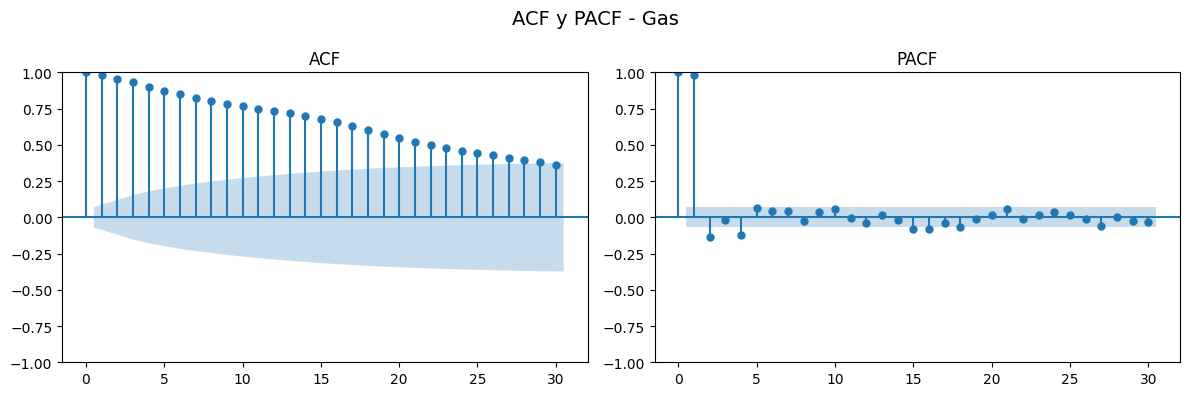

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para mostrar ACF y PACF para una serie
def graficar_acf_pacf(serie, nombre, lags=30):
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"ACF y PACF - {nombre}", fontsize=14)

    plt.subplot(1, 2, 1)
    plot_acf(serie.dropna(), lags=lags, ax=plt.gca())
    plt.title("ACF")

    plt.subplot(1, 2, 2)
    plot_pacf(serie.dropna(), lags=lags, ax=plt.gca(), method='ywm')
    plt.title("PACF")

    plt.tight_layout()
    plt.show()

# Ejecutamos para las tres materias primas
graficar_acf_pacf(datos_mmpp['close_gold_norm'], "Oro")
graficar_acf_pacf(datos_mmpp['close_oil_norm'], "Petróleo")
graficar_acf_pacf(datos_mmpp['close_gas_norm'], "Gas")


## **5.4 Análisis de outliers**

La detección de outliers permite identificar valores anómalos que pueden estar distorsionando las distribuciones estadísticas o señalando eventos relevantes (p. ej., shocks del mercado).

Se aplica el método del rango intercuartílico (IQR) para detectar valores extremos en las variables clave de cada materia prima. Este método considera como outliers aquellos valores que están por debajo de:

- **Q1 - 1.5 × IQR** o por encima de **Q3 + 1.5 × IQR**

donde Q1 y Q3 son los cuartiles 25% y 75%, respectivamente, e IQR es la diferencia entre ambos.


 returnsumweek_gold: 21 outliers detectados
 returnsumweek_oil: 24 outliers detectados
 returnsumweek_gas: 33 outliers detectados
 volatilidad_gold: 28 outliers detectados
 volatilidad_oil: 38 outliers detectados
 volatilidad_gas: 37 outliers detectados


/tmp/ipython-input-22-1245639207.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette="Set2")


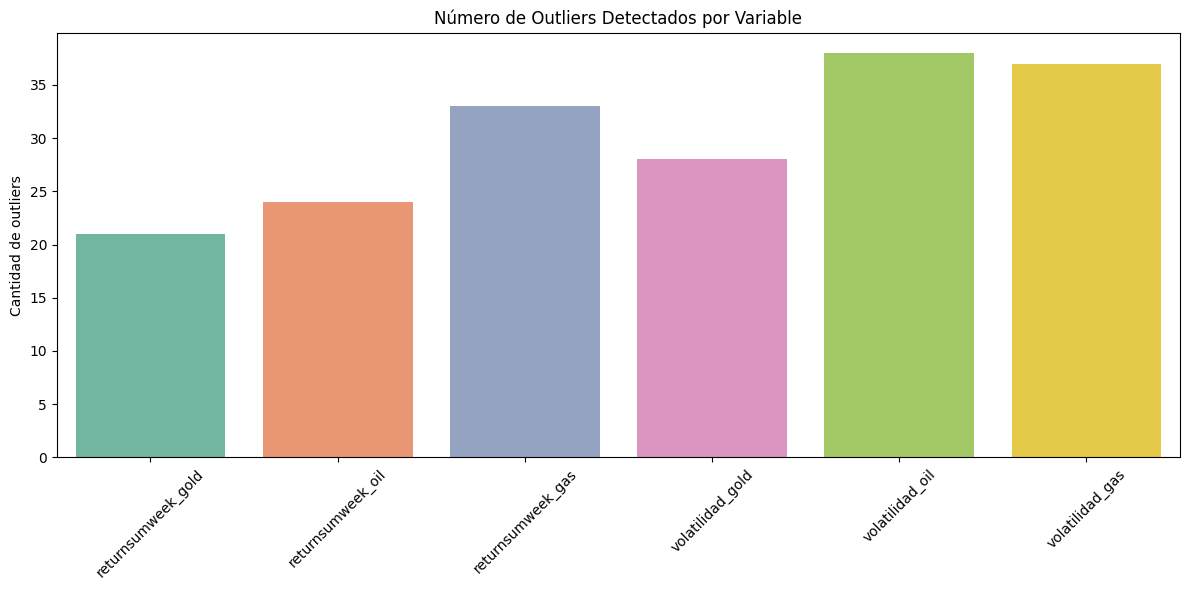

In [22]:
def detectar_outliers_IQR(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return serie[(serie < limite_inferior) | (serie > limite_superior)]

# Variables a analizar
vars_outlier = ['returnsumweek_gold', 'returnsumweek_oil', 'returnsumweek_gas',
                'volatilidad_gold', 'volatilidad_oil', 'volatilidad_gas']

# Detección de outliers y resumen
outlier_counts = {}
for var in vars_outlier:
    if var in df_final.columns:
        outliers = detectar_outliers_IQR(df_final[var].dropna())
        outlier_counts[var] = len(outliers)
        print(f" {var}: {len(outliers)} outliers detectados")

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette="Set2")
plt.title("Número de Outliers Detectados por Variable")
plt.ylabel("Cantidad de outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **5.5 Pruebas de normalidad**

Verificar si una variable sigue una distribución normal es esencial para aplicar correctamente muchas técnicas estadísticas. En este apartado se aplican dos pruebas comunes:

- **Shapiro-Wilk**: buena para detectar desviaciones de la normalidad en muestras pequeñas o medianas.
- **D'Agostino y Pearson**: combina información sobre asimetría y curtosis.

El objetivo es evaluar la normalidad de las variables de retorno y volatilidad para las tres materias primas.


In [23]:
from scipy.stats import shapiro, normaltest

vars_normalidad = ['returnsumweek_gold', 'returnsumweek_oil', 'returnsumweek_gas',
                   'volatilidad_gold', 'volatilidad_oil', 'volatilidad_gas']

for var in vars_normalidad:
    if var in df_final.columns:
        print(f"\n Variable: {var}")
        datos = df_final[var].dropna()

        # Prueba de Shapiro-Wilk
        stat_shapiro, p_shapiro = shapiro(datos)
        print(f"• Shapiro-Wilk: Estadístico = {stat_shapiro:.3f}, p-valor = {p_shapiro:.4f}")

        # Prueba de D'Agostino-Pearson
        stat_dagostino, p_dagostino = normaltest(datos)
        print(f"• D’Agostino-Pearson: Estadístico = {stat_dagostino:.3f}, p-valor = {p_dagostino:.4f}")

        # Interpretación
        if p_shapiro < 0.05 or p_dagostino < 0.05:
            print(" Rechazamos la hipótesis de normalidad.")
        else:
            print("No se rechaza la hipótesis de normalidad.")



 Variable: returnsumweek_gold
• Shapiro-Wilk: Estadístico = 0.958, p-valor = 0.0000
• D’Agostino-Pearson: Estadístico = 159.162, p-valor = 0.0000
 Rechazamos la hipótesis de normalidad.

 Variable: returnsumweek_oil
• Shapiro-Wilk: Estadístico = 0.894, p-valor = 0.0000
• D’Agostino-Pearson: Estadístico = 203.776, p-valor = 0.0000
 Rechazamos la hipótesis de normalidad.

 Variable: returnsumweek_gas
• Shapiro-Wilk: Estadístico = 0.980, p-valor = 0.0000
• D’Agostino-Pearson: Estadístico = 33.717, p-valor = 0.0000
 Rechazamos la hipótesis de normalidad.

 Variable: volatilidad_gold
• Shapiro-Wilk: Estadístico = 0.878, p-valor = 0.0000
• D’Agostino-Pearson: Estadístico = 321.962, p-valor = 0.0000
 Rechazamos la hipótesis de normalidad.

 Variable: volatilidad_oil
• Shapiro-Wilk: Estadístico = 0.604, p-valor = 0.0000
• D’Agostino-Pearson: Estadístico = 973.003, p-valor = 0.0000
 Rechazamos la hipótesis de normalidad.

 Variable: volatilidad_gas
• Shapiro-Wilk: Estadístico = 0.807, p-valor 

## **5.6 Análisis de correlación entre variables independientes**

La multicolinealidad ocurre cuando dos o más variables explicativas están fuertemente correlacionadas entre sí. Esto puede dificultar la estimación precisa de los coeficientes en modelos predictivos y afectar su interpretación.

En este apartado se identifican las variables independientes que presentan alta correlación (|r| > 0.85), con el objetivo de valorar su exclusión o transformación.


In [24]:
# Selección de variables explicativas (excluyendo las de materias primas)
vars_explicativas = [col for col in df_final.columns if not col.startswith(('close_', 'Volume_', 'returnsumweek_', 'volatilidad_', 'kurtosis_'))]

# Cálculo de la matriz de correlación
correlacion = df_final[vars_explicativas].corr()

# Filtro de pares con correlación alta
umbral = 0.85
correlaciones_altas = []

for i in range(len(correlacion.columns)):
    for j in range(i + 1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > umbral:
            var1 = correlacion.columns[i]
            var2 = correlacion.columns[j]
            corr_val = correlacion.iloc[i, j]
            correlaciones_altas.append((var1, var2, corr_val))

# Mostrar resultados
print(" Pares de variables con alta correlación (|r| > 0.85):")
for var1, var2, corr in correlaciones_altas:
    print(f"{var1} ↔ {var2} : r = {corr:.2f}")


 Pares de variables con alta correlación (|r| > 0.85):
GPRC_DEU ↔ GPRC_POL : r = 0.88
GPRC_DEU ↔ GPRC_RUS : r = 0.91
GPRC_GBR ↔ GPRC_USA : r = 0.88
GPRC_POL ↔ GPRC_RUS : r = 0.90
USA_involved ↔ USA_conflict_count : r = 0.92
Iran_involved ↔ Iran_conflict_count : r = 0.88
num_elections ↔ num_compulsory_voting : r = 0.89
GEPU_current ↔ GEPU_ppp : r = 1.00
GEPU_current ↔ GEPU_Hybrid China : r = 0.93
GEPU_current ↔ GEPU_Singapore : r = 0.99
GEPU_current ↔ GEPU_SCMP China : r = 0.92
GEPU_ppp ↔ GEPU_Hybrid China : r = 0.95
GEPU_ppp ↔ GEPU_Singapore : r = 0.99
GEPU_ppp ↔ GEPU_SCMP China : r = 0.94
GEPU_ppp ↔ GEPU_Mainland China : r = 0.85
GEPU_Hybrid China ↔ GEPU_Singapore : r = 0.95
GEPU_Hybrid China ↔ GEPU_SCMP China : r = 0.97
GEPU_Hybrid China ↔ GEPU_Mainland China : r = 0.93
GEPU_Singapore ↔ GEPU_SCMP China : r = 0.94
GEPU_Singapore ↔ GEPU_Mainland China : r = 0.86
num_sanctions ↔ num_OPEP_sanctioned : r = 0.93
num_sanctions ↔ num_OPEP_sanctions_active : r = 0.97
num_sanctions ↔ avg_sanct

## **5.7 Detección de outliers en variables clave**

Los valores atípicos (outliers) son observaciones que se desvían significativamente del resto de los datos. Detectarlos es esencial para asegurar la robustez de los modelos y evitar sesgos en los resultados.

A continuación, se analizan los principales indicadores de cada materia prima (oro, petróleo y gas) para identificar la presencia de outliers mediante el método del rango intercuartílico (IQR).


In [25]:
# Variables de materias primas a analizar
vars_mmpp = [col for col in df_final.columns if col.startswith(('close_', 'Volume_', 'returnsumweek_', 'volatilidad_', 'kurtosis_'))]

# Detección de outliers por variable
outliers_dict = {}

for var in vars_mmpp:
    q1 = df_final[var].quantile(0.25)
    q3 = df_final[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_final[(df_final[var] < lower_bound) | (df_final[var] > upper_bound)]
    outliers_dict[var] = len(outliers)

# Resultados
print(" Número de outliers detectados por variable:")
for var, count in outliers_dict.items():
    print(f"{var}: {count} observaciones")


 Número de outliers detectados por variable:
close_gold_norm: 15 observaciones
Volume_gold: 118 observaciones
returnsumweek_gold: 21 observaciones
volatilidad_gold: 28 observaciones
kurtosis_gold: 0 observaciones
close_oil_norm: 0 observaciones
Volume_oil: 22 observaciones
returnsumweek_oil: 24 observaciones
volatilidad_oil: 38 observaciones
kurtosis_oil: 0 observaciones
close_gas_norm: 33 observaciones
Volume_gas: 14 observaciones
returnsumweek_gas: 33 observaciones
volatilidad_gas: 37 observaciones
kurtosis_gas: 0 observaciones


## **5.8 Análisis de normalidad**

La verificación de la normalidad es una etapa clave en el análisis estadístico. Muchas pruebas paramétricas (como la t de Student, ANOVA, regresión lineal) suponen que las variables siguen una distribución normal.

Para evaluar la normalidad de las variables se emplean:

- Histogramas y gráficas de densidad.
- Gráficos Q-Q (Quantile-Quantile).
- Pruebas estadísticas formales:
  - **Shapiro-Wilk**: adecuada para muestras pequeñas.
  - **Kolmogorov-Smirnov**: más general, pero menos potente con muestras pequeñas.

A continuación, se analiza la distribución de las principales variables dependientes del modelo: `close_gold_norm`, `close_oil_norm` y `close_gas_norm`.


Análisis de normalidad: close_gold_norm


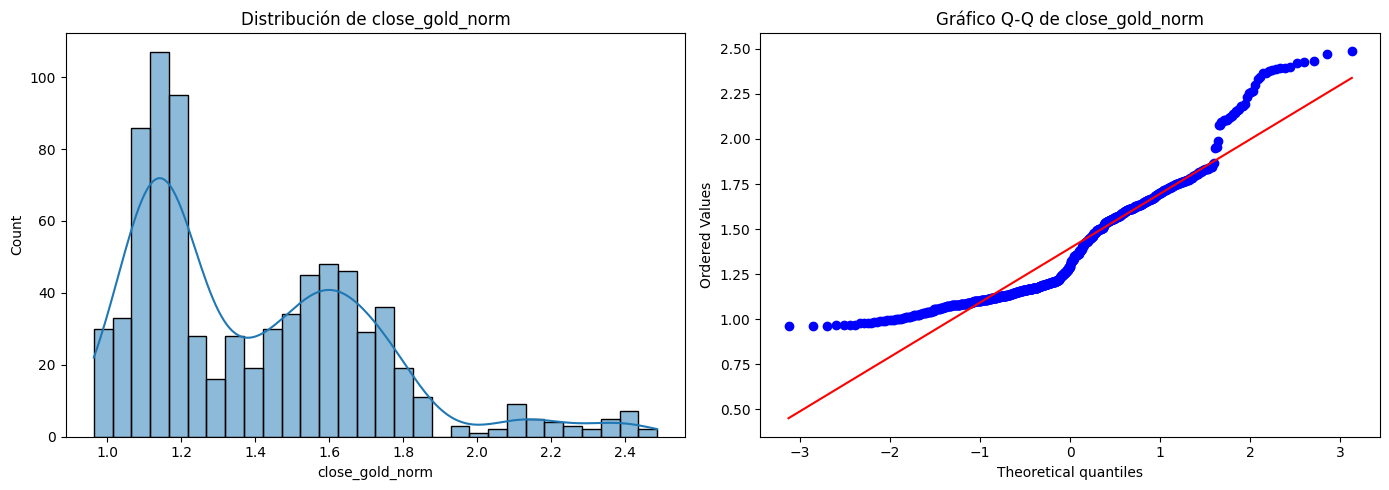

➤ Shapiro-Wilk: estadístico=0.903, p-valor=0.0000
 Rechazamos H0: No sigue una distribución normal.

Análisis de normalidad: close_oil_norm


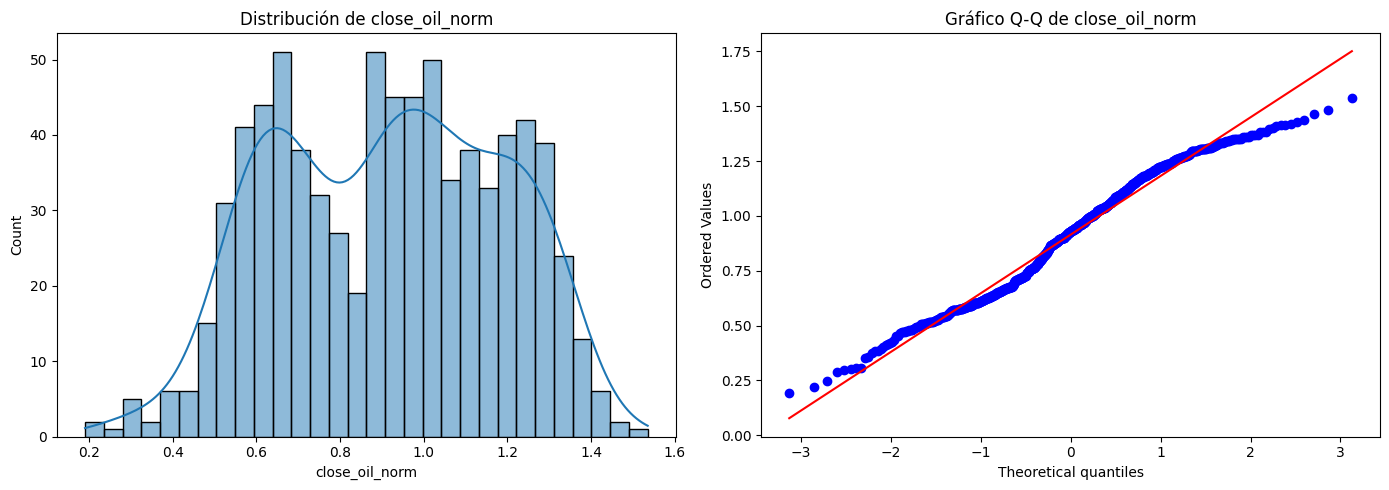

➤ Shapiro-Wilk: estadístico=0.977, p-valor=0.0000
 Rechazamos H0: No sigue una distribución normal.

Análisis de normalidad: close_gas_norm


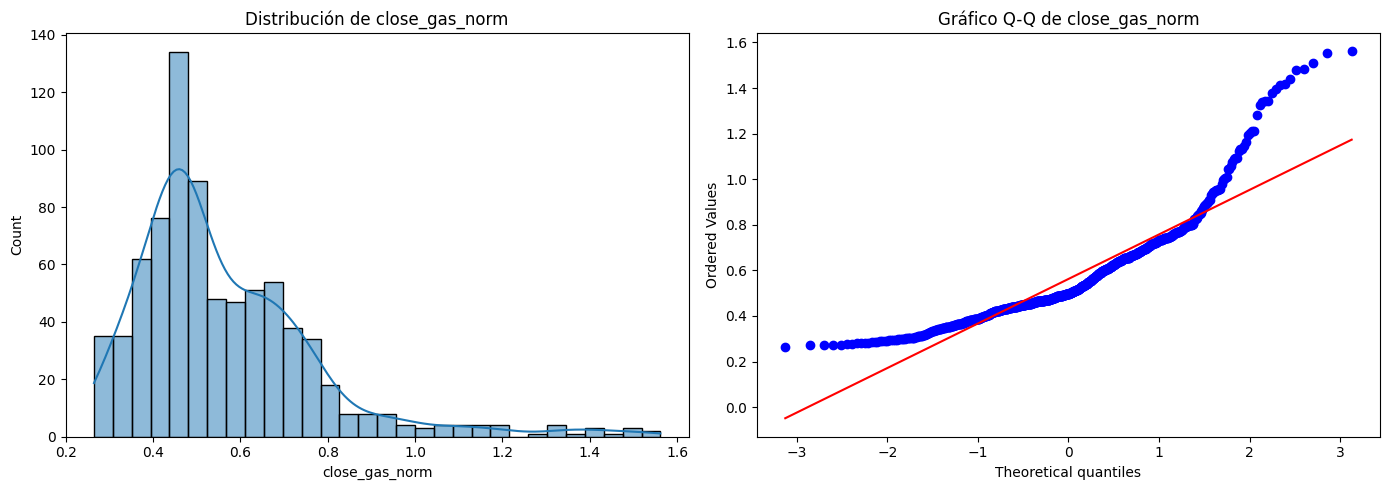

➤ Shapiro-Wilk: estadístico=0.859, p-valor=0.0000
 Rechazamos H0: No sigue una distribución normal.



In [26]:
from scipy.stats import shapiro, probplot
import seaborn as sns
import matplotlib.pyplot as plt

# Variables a analizar
vars_normalidad = ['close_gold_norm', 'close_oil_norm', 'close_gas_norm']

for var in vars_normalidad:
    print(f"Análisis de normalidad: {var}")

    # Histogramas y KDE
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_final[var], kde=True, bins=30)
    plt.title(f"Distribución de {var}")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(df_final[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Gráfico Q-Q de {var}")

    plt.tight_layout()
    plt.show()

    # Test de Shapiro-Wilk
    stat, p = shapiro(df_final[var].dropna())
    print(f"➤ Shapiro-Wilk: estadístico={stat:.3f}, p-valor={p:.4f}")
    if p < 0.05:
        print(" Rechazamos H0: No sigue una distribución normal.\n")
    else:
        print("No se rechaza H0: Podría seguir una distribución normal.\n")


## **5.9 Análisis de correlación múltiple**

El análisis de correlación múltiple permite evaluar la relación entre todas las variables explicativas del dataset. Esto es especialmente útil para detectar:

- Redundancias entre variables.
- Multicolinealidad (altas correlaciones entre predictores).
- Agrupaciones de variables que se comportan de forma similar.

La matriz de correlación de Pearson muestra el grado de relación lineal entre pares de variables. Para facilitar su interpretación, se acompaña de un mapa de calor (*heatmap*) que destaca visualmente los valores más altos (positiva o negativamente).


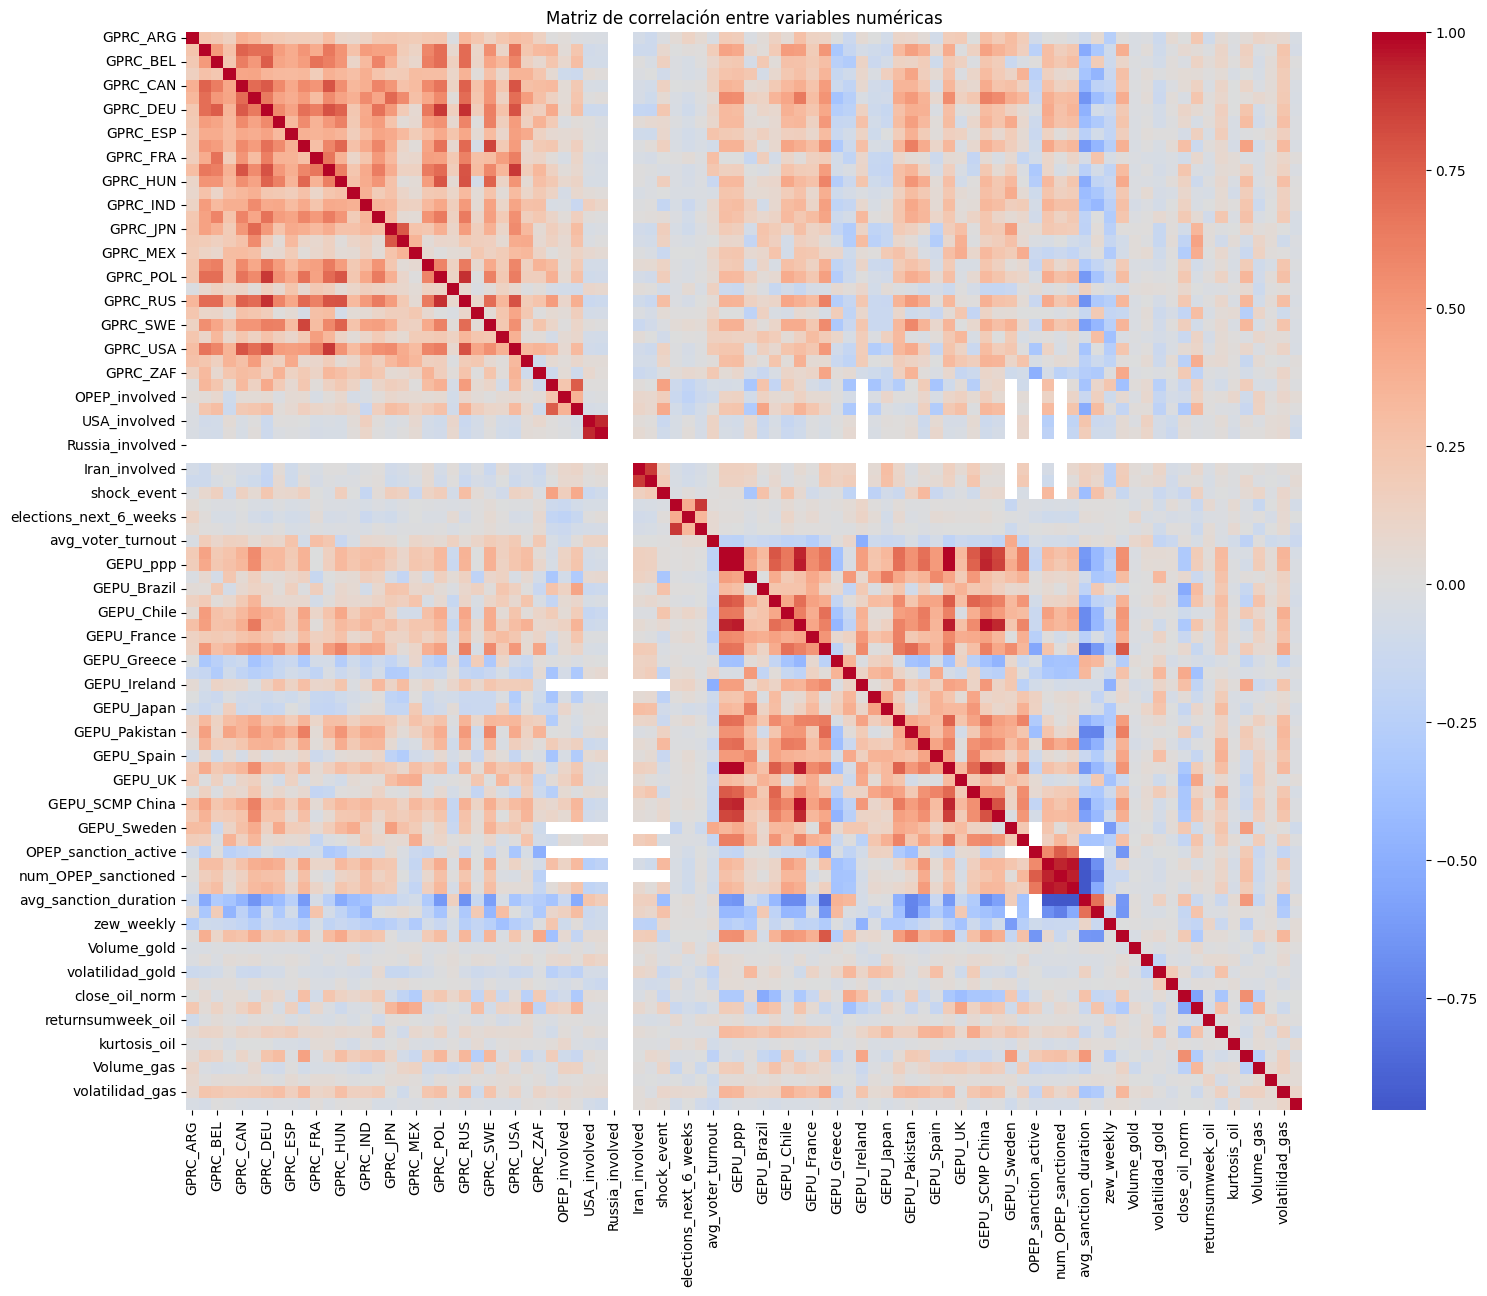

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos únicamente las variables numéricas
corr_matrix = df_final.select_dtypes(include='number').corr()

# Matriz de correlación completa
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


## **5.10 Selección de variables: eliminación por alta correlación**

Una alta correlación entre variables explicativas puede generar problemas de multicolinealidad en modelos predictivos. Para mitigar este riesgo, se identifican pares de variables con una correlación absoluta superior a 0.9 y se elimina una de cada par redundante.

Este proceso no solo reduce la dimensionalidad del conjunto de datos, sino que también mejora la interpretabilidad y estabilidad de los modelos posteriores.


In [28]:
import numpy as np  # Asegúrate de tener esto al principio

# Umbral de correlación alta
threshold = 0.9

# Matriz de correlación absoluta
corr_matrix = df_final.select_dtypes(include='number').corr().abs()

# Máscara para quedarnos solo con la parte superior de la matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontramos las variables con correlación alta
vars_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Mostramos las variables candidatas a eliminar
print("Variables eliminadas por alta correlación (>|0.9|):")
print(vars_to_drop)

# Creamos un nuevo dataframe sin las variables altamente correlacionadas
df_reduced = df_final.drop(columns=vars_to_drop)


Variables eliminadas por alta correlación (>|0.9|):
['GPRC_RUS', 'USA_conflict_count', 'GEPU_ppp', 'GEPU_Hybrid China', 'GEPU_Singapore', 'GEPU_SCMP China', 'GEPU_Mainland China', 'num_OPEP_sanctioned', 'num_OPEP_sanctions_active', 'avg_sanction_duration']


In [29]:
from google.colab import files

# Guarda el CSV
df_final.to_csv('df_final.csv', index=True, encoding='utf-8')
df_reduced.to_csv('df_reduced.csv', index=True, encoding='utf-8')

## **5.11 Selección de variables: eliminación por baja varianza**

Las variables con baja varianza apenas muestran variabilidad a lo largo del tiempo, lo que implica que su aportación al análisis predictivo es limitada. Estas variables pueden ser redundantes o incluso engañosas en los procesos de modelado.

Por ello, se aplica un umbral para identificar y eliminar aquellas variables cuya varianza normalizada sea menor a 0.01.


In [30]:
from sklearn.feature_selection import VarianceThreshold

# Seleccionamos únicamente las columnas numéricas
numeric_df = df_reduced.select_dtypes(include='number')

# Aplicamos el umbral de varianza (se eliminarán variables con varianza < 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric_df)

# Obtenemos las variables seleccionadas
selected_columns = numeric_df.columns[selector.get_support()]
low_var_columns = numeric_df.columns[~selector.get_support()]

# Mostramos las variables eliminadas
print(" Variables eliminadas por baja varianza:")
print(list(low_var_columns))

# Dataset reducido final
df_reduced_var = numeric_df[selected_columns]


 Variables eliminadas por baja varianza:
['GPRC_ARG', 'GPRC_AUS', 'GPRC_BRA', 'GPRC_DNK', 'GPRC_ESP', 'GPRC_FIN', 'GPRC_HUN', 'GPRC_IDN', 'GPRC_IND', 'GPRC_ITA', 'GPRC_MEX', 'GPRC_NLD', 'GPRC_PRT', 'GPRC_SWE', 'GPRC_VEN', 'GPRC_ZAF', 'Russia_involved', 'Russia_conflict_count', 'severity_index', 'returnsumweek_gold', 'volatilidad_gold', 'returnsumweek_oil', 'volatilidad_oil', 'returnsumweek_gas', 'volatilidad_gas']


In [31]:
from google.colab import files

# Guarda el CSV
df_reduced_var.to_csv('df_reduced_var.csv', index=True, encoding='utf-8')

## **5.12 Selección de variables: Gestion de valores nulos**

In [32]:
import pandas as pd
import numpy as np

# ─────────────────────────────────────────────────────────
# Parte 0) Arranca de tu df_reduced_var existente
# ─────────────────────────────────────────────────────────
# df_reduced_var = numeric_df[selected_columns]

# Trabajaremos sobre una copia para no tocar el original
df_reduced_var_processed = df_reduced_var.copy()

# ─────────────────────────────────────────────────────────
# 1) Detectar cuántos NaN hay y agrupar dinámicamente
# ─────────────────────────────────────────────────────────
null_counts = df_reduced_var_processed.isnull().sum().sort_values(ascending=False)

drop_cols  = [c for c in ['GEPU_Sweden','GEPU_Ireland'] if c in df_reduced_var_processed.columns]
mask_cols  = null_counts[null_counts == 366].index.tolist()
keep_later = null_counts[null_counts == 209].index.tolist()
impute_cols = [
    c for c in null_counts.index
    if (null_counts[c] > 0)
    and c not in drop_cols + mask_cols + keep_later
]

print("→ Drop:      ", drop_cols)
print("→ Mask:      ", mask_cols)
print("→ Keep later:", keep_later)
print("→ Impute:    ", impute_cols, "\n")

# ─────────────────────────────────────────────────────────
# 2) Eliminar las columnas a dropear
# ─────────────────────────────────────────────────────────
df_reduced_var_processed.drop(columns=drop_cols, inplace=True)

# ─────────────────────────────────────────────────────────
# 3) Crear máscaras para las de 366 nulos
# ─────────────────────────────────────────────────────────
for c in mask_cols:
    df_reduced_var_processed[f"{c}_mask"] = df_reduced_var_processed[c].isna().astype(int)

# ─────────────────────────────────────────────────────────
# 4) Asegurar tipo float en las columnas a imputar
# ─────────────────────────────────────────────────────────
df_reduced_var_processed[impute_cols] = (
    df_reduced_var_processed[impute_cols]
    .astype(str)
    .applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
    .apply(pd.to_numeric, errors='coerce')
)

# ─────────────────────────────────────────────────────────
# 5) Imputación: interpolar → rolling mean → ffill/bfill
# ─────────────────────────────────────────────────────────
# 5.1 Interpolación lineal
df_reduced_var_processed[impute_cols] = df_reduced_var_processed[impute_cols].interpolate(
    method='linear', limit_direction='both', axis=0
)

# 5.2 Rolling mean ventana=9
for c in impute_cols:
    roll = df_reduced_var_processed[c].rolling(window=9, center=True, min_periods=1).mean()
    df_reduced_var_processed[c] = df_reduced_var_processed[c].fillna(roll)

# 5.3 Forward/back fill para bordes extremos
df_reduced_var_processed[impute_cols] = df_reduced_var_processed[impute_cols].ffill().bfill()

# ─────────────────────────────────────────────────────────
# 6) Verificación final de nulos
# ─────────────────────────────────────────────────────────
print("Nulos restantes en df_reduced_var_processed:\n",
      df_reduced_var_processed.isnull().sum().loc[lambda x: x>0])

# Ahora tienes:
#  • df_reduced_var      = original sin tocar
#  • df_reduced_var_processed = nuevo DataFrame listo para usar en tu LSTM


→ Drop:       ['GEPU_Sweden', 'GEPU_Ireland']
→ Mask:       ['OPEP_conflict_count', 'conflict_count', 'Iran_conflict_count', 'USA_involved', 'shock_event', 'Iran_involved', 'OPEP_involved']
→ Keep later: []
→ Impute:     ['avg_voter_turnout', 'GEPU_Mexico', 'GEPU_Chile', 'GEPU_Pakistan', 'GEPU_Australia', 'GEPU_India', 'GPRC_CHN', 'GEPU_Greece', 'GEPU_Russia', 'GPRC_DEU', 'GPRC_SAU', 'GPRC_GBR', 'GPRC_JPN', 'GEPU_UK', 'GEPU_US', 'GPRC_TUR', 'GEPU_France', 'GEPU_Italy', 'GPRC_KOR', 'GEPU_current', 'GEPU_Canada', 'GPRC_BEL', 'GPRC_FRA', 'GEPU_Brazil', 'GEPU_Spain', 'GEPU_Japan', 'GEPU_Germany', 'GPRC_POL', 'GEPU_Korea', 'GPRC_CAN', 'GPRC_USA'] 

Nulos restantes en df_reduced_var_processed:
 conflict_count         366
OPEP_involved          366
OPEP_conflict_count    366
USA_involved           366
Iran_involved          366
Iran_conflict_count    366
shock_event            366
dtype: int64


/tmp/ipython-input-32-649964066.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


Se partió del DataFrame df_reduced_var y se trabajó sobre una copia (df_reduced_var_processed) para preservar el original. El tratamiento de valores faltantes se realizó en etapas:

Columnas eliminadas: Se descartaron ['GEPU_Sweden', 'GEPU_Ireland'] por contener datos irreparables o irrelevantes.

Columnas enmascaradas: Se crearon columnas binarias (*_mask) para marcar faltantes completos (366 NaNs), conservando así la información de ausencia.

Conversión de tipos: Se aseguraron los tipos numéricos (float) en columnas con NaNs parciales, convirtiendo comas decimales y forzando errores a NaN.

Imputación de valores faltantes:

Interpolación lineal.

Promedio móvil centrado (ventana de 9).

Relleno hacia adelante y hacia atrás (ffill + bfill) para cubrir bordes extremos.

Al finalizar, solo permanecen con NaNs las columnas enmascaradas a propósito, las cuales serán tratadas posteriormente según su naturaleza.

In [33]:
from google.colab import files

# Guarda el CSV
df_reduced_var_processed.to_csv('df_reduced_var_processed.csv', index=True, encoding='utf-8')

# **6. Preprocesado y Normalización**

## **6.1 Tratamiento de la Variable Dependiente: Variación Semanal**

Para modelar el impacto de los eventos geopolíticos sobre las materias primas, se transforma la variable dependiente desde su valor absoluto a una tasa de variación semanal. Esta aproximación permite capturar mejor la reacción del mercado a eventos o shocks repentinos.

La fórmula aplicada es:

\[
\text{Variación}_t = \frac{Precio_t - Precio_{t-1}}{Precio_{t-1}}
\]

Esta operación se realiza para las tres materias primas consideradas: **oro**, **petróleo** y **gas natural**.


In [34]:
from statsmodels.tsa.stattools import adfuller

def test_adf(series, nombre):
    resultado = adfuller(series.dropna())
    print(f"--- Test ADF para {nombre} ---")
    print(f"Estadístico ADF: {resultado[0]:.4f}")
    print(f"p-value: {resultado[1]:.4f}")
    print(f"Usar criterio de rechazo al 5%: {'Rechaza H0 (es estacionaria)' if resultado[1] < 0.05 else 'No rechaza H0 (no estacionaria)'}")
    print()

# Ejecutamos para las 3 materias primas
test_adf(datos_mmpp['close_gold_norm'], 'Oro')
test_adf(datos_mmpp['close_oil_norm'], 'Petróleo')
test_adf(datos_mmpp['close_gas_norm'], 'Gas')


--- Test ADF para Oro ---
Estadístico ADF: 0.2519
p-value: 0.9750
Usar criterio de rechazo al 5%: No rechaza H0 (no estacionaria)

--- Test ADF para Petróleo ---
Estadístico ADF: -2.1706
p-value: 0.2171
Usar criterio de rechazo al 5%: No rechaza H0 (no estacionaria)

--- Test ADF para Gas ---
Estadístico ADF: -3.6887
p-value: 0.0043
Usar criterio de rechazo al 5%: Rechaza H0 (es estacionaria)



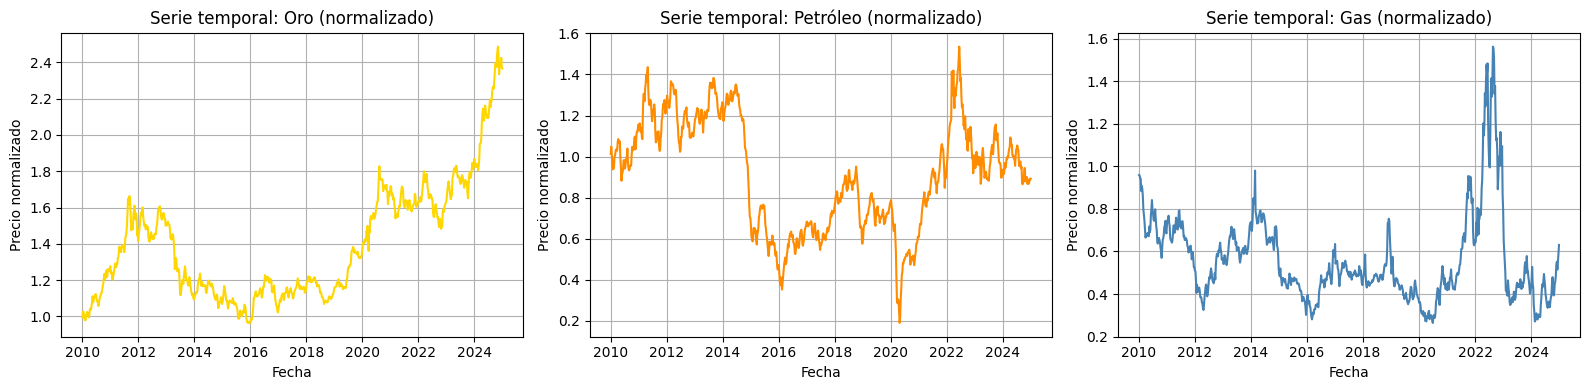

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))

# Oro
plt.subplot(1, 3, 1)
plt.plot(datos_mmpp['Date'], datos_mmpp['close_gold_norm'], label='Oro', color='gold')
plt.title('Serie temporal: Oro (normalizado)')
plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.grid(True)

# Petróleo
plt.subplot(1, 3, 2)
plt.plot(datos_mmpp['Date'], datos_mmpp['close_oil_norm'], label='Petróleo', color='darkorange')
plt.title('Serie temporal: Petróleo (normalizado)')
plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.grid(True)

# Gas
plt.subplot(1, 3, 3)
plt.plot(datos_mmpp['Date'], datos_mmpp['close_gas_norm'], label='Gas', color='steelblue')
plt.title('Serie temporal: Gas (normalizado)')
plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.grid(True)

plt.tight_layout()
plt.show()


**Test de Causalidad de Granger**

El test de Granger permite evaluar si una variable temporal (en este caso, el índice de riesgo geopolítico `GPRC_USA`) aporta valor predictivo sobre otra (precio del oro). En otras palabras, verifica si la evolución pasada del riesgo geopolítico ayuda a anticipar los cambios en el precio del oro. A continuación, se presentan los resultados para diferentes retardos (lags).


In [36]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Fusionar por fecha
datos_merged = pd.merge(
    datos_mmpp[['Date', 'close_gold_norm']],
    weekly_data[['week', 'GPRC_USA']],
    left_on='Date', right_on='week'
).dropna()

# Corregir formato de coma en GPRC_USA si es necesario
datos_merged['GPRC_USA'] = datos_merged['GPRC_USA'].astype(str).str.replace(',', '.', regex=False).astype(float)

# Ejecutar test de Granger
print("Test de Causalidad de Granger: GPRC_USA → Oro")
grangercausalitytests(datos_merged[['close_gold_norm', 'GPRC_USA']], maxlag=4, verbose=True)


Test de Causalidad de Granger: GPRC_USA → Oro

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3948  , p=0.5300  , df_denom=779, df_num=1
ssr based chi2 test:   chi2=0.3963  , p=0.5290  , df=1
likelihood ratio test: chi2=0.3962  , p=0.5291  , df=1
parameter F test:         F=0.3948  , p=0.5300  , df_denom=779, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2698  , p=0.7636  , df_denom=776, df_num=2
ssr based chi2 test:   chi2=0.5430  , p=0.7622  , df=2
likelihood ratio test: chi2=0.5428  , p=0.7623  , df=2
parameter F test:         F=0.2698  , p=0.7636  , df_denom=776, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7029  , p=0.5505  , df_denom=773, df_num=3
ssr based chi2 test:   chi2=2.1277  , p=0.5463  , df=3
likelihood ratio test: chi2=2.1248  , p=0.5469  , df=3
parameter F test:         F=0.7029  , p=0.5505  , df_denom=773, df_num=3

Granger Causality
number of lags (no zero) 4
ss

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(0.39477067685767697),
    np.float64(0.5299864910679292),
    np.float64(779.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.39629097471463853),
    np.float64(0.5290109954926208),
    np.int64(1)),
   'lrtest': (np.float64(0.3961905952401139),
    np.float64(0.5290631789445154),
    np.int64(1)),
   'params_ftest': (np.float64(0.39477067685713185),
    np.float64(0.5299864910681998),
    np.float64(779.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.2697773062462459),
    np.float64(0.7636210953739464),
    np.float64(776.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.5430311241709228),
    np.float64(0.762223421589714),
    np.int64(2)),
   'lrtest': (np.float64(0.5428424262290719),
    np.float64(0.762295339977816),
    np.int64(2)),
   'params_ftest': (np.float64(0.26977730624608276),
    np.float64(0.763621095374078),
    np.float64(776.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
     

In [37]:
# Cálculo de la variación porcentual semanal sobre precios normalizados
df_final['Var_Oro'] = df_final['close_gold_norm'].pct_change()
df_final['Var_Petroleo'] = df_final['close_oil_norm'].pct_change()
df_final['Var_Gas'] = df_final['close_gas_norm'].pct_change()

# Visualización rápida de resultados
df_final[['close_gold_norm', 'Var_Oro', 'close_oil_norm', 'Var_Petroleo', 'close_gas_norm', 'Var_Gas']].head(10)


,close_gold_norm,Var_Oro,close_oil_norm,Var_Petroleo,close_gas_norm,Var_Gas
week,,,,,,
2010-01-04,0.993813,NaN,1.012505,NaN,0.959057,NaN
2010-01-11,1.025289,0.031672,1.048318,0.035371,0.956761,-0.002393
2010-01-18,1.024657,-0.000617,1.008728,-0.037765,0.943364,-0.014003
2010-01-25,1.000560,-0.023517,0.971233,-0.037171,0.941870,-0.001584
2010-02-01,0.985043,-0.015508,0.937768,-0.034456,0.883539,-0.061931
2010-02-08,0.977077,-0.008087,0.940536,0.002951,0.908347,0.028078
2010-02-15,0.979091,0.002061,0.944776,0.004508,0.895075,-0.014611
2010-02-22,1.009881,0.031447,0.998781,0.057162,0.861669,-0.037322
2010-03-01,1.001283,-0.008514,1.003910,0.005135,0.796427,-0.075716


A continuación se visualizan las series temporales de las variaciones porcentuales semanales para cada materia prima. Estas gráficas permiten identificar comportamientos volátiles, reacciones ante shocks geopolíticos y potenciales patrones de estacionalidad o tendencia.


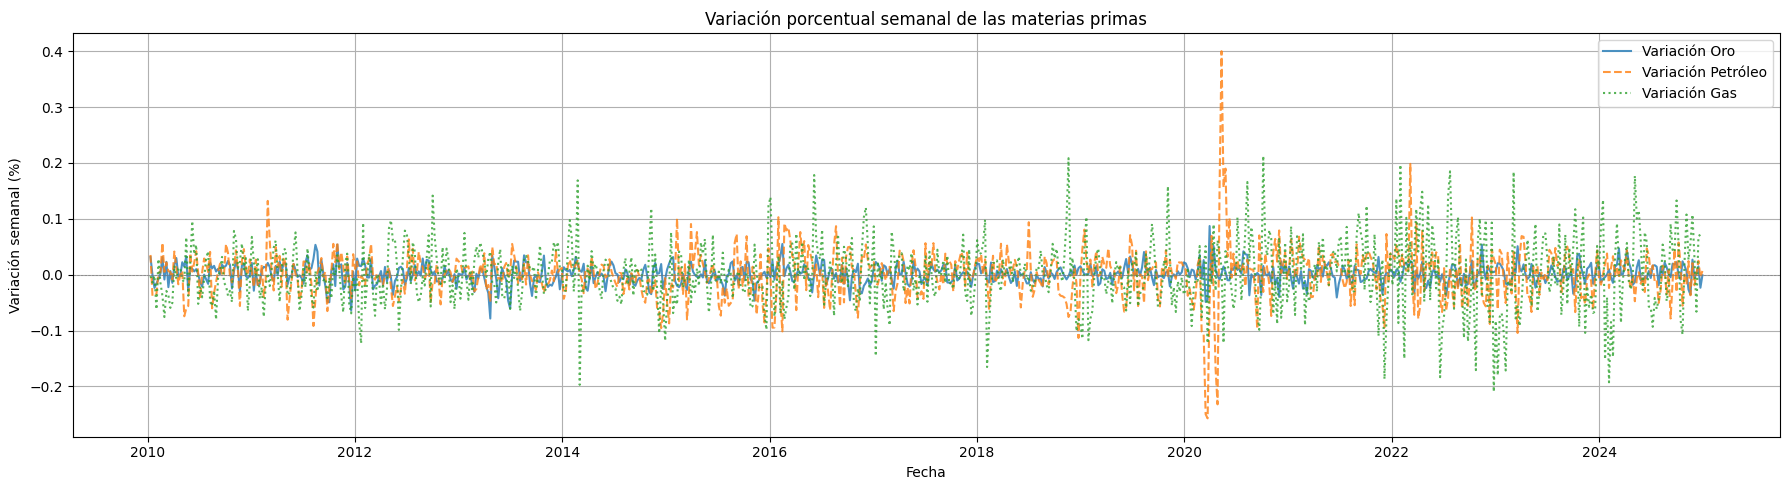

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.plot(df_final.index, df_final['Var_Oro'], label='Variación Oro', linestyle='-', alpha=0.8)
plt.plot(df_final.index, df_final['Var_Petroleo'], label='Variación Petróleo', linestyle='--', alpha=0.8)
plt.plot(df_final.index, df_final['Var_Gas'], label='Variación Gas', linestyle=':', alpha=0.8)

plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.title("Variación porcentual semanal de las materias primas")
plt.xlabel("Fecha")
plt.ylabel("Variación semanal (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


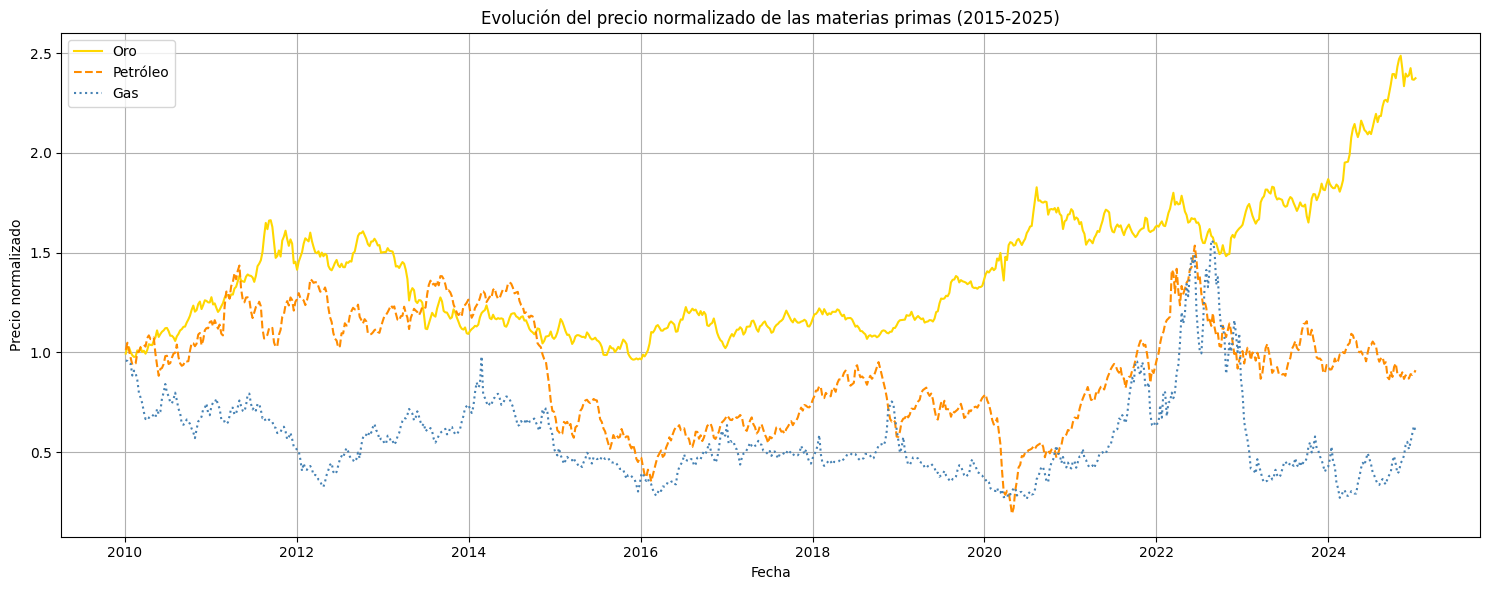

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
datos_mmpp = pd.read_csv('/content/datos_mmpp.csv')

# Asegurar que la columna 'Date' esté en formato datetime
datos_mmpp['Date'] = pd.to_datetime(datos_mmpp['Date'])

# Crear la figura
plt.figure(figsize=(15, 6))

# Trazar cada serie temporal
plt.plot(datos_mmpp['Date'], datos_mmpp['close_gold_norm'], label='Oro', color='gold', linestyle='-')
plt.plot(datos_mmpp['Date'], datos_mmpp['close_oil_norm'], label='Petróleo', color='darkorange', linestyle='--')
plt.plot(datos_mmpp['Date'], datos_mmpp['close_gas_norm'], label='Gas', color='steelblue', linestyle=':')

# Detalles de formato
plt.title('Evolución del precio normalizado de las materias primas (2015-2025)')
plt.xlabel('Fecha')
plt.ylabel('Precio normalizado')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()
